In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table,mcnemar_tables
from mlxtend.plotting import checkerboard_plot
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
# py.init_notebook_mode()

#Reading the File

In [3]:
df = pd.read_csv("C:/Users/kripa/OneDrive/Documents/ML/ML-Projects/EDA/RTA/Dataset/RTA_Dataset.csv")

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
x = df.iloc[:,:-1]
x._get_numeric_data()

,Number_of_vehicles_involved,Number_of_casualties
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
12311,2,1
12312,2,1
12313,1,1
12314,2,1


In [6]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8348,17:23:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,No defect,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - no lighting,Normal,Collision with roadside objects,3,1,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
5386,7:23:00,Wednesday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,No defect,Office areas,NaN,Steep grade downward with mountainous terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
1783,16:58:00,Thursday,Unknown,Male,Elementary school,Employee,5-10yr,NaN,Owner,Unknown,No defect,Rural village areasOffice areas,other,Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Pedestrian,Female,Under 18,3,NaN,NaN,Crossing from driver's nearside,No distancing,Slight Injury
7077,18:00:00,Saturday,Over 51,Male,Elementary school,Employee,Below 1yr,Public (13?45 seats),Governmental,NaN,No defect,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,3,Going straight,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Moving Backward,Fatal injury
5437,19:00:00,Tuesday,31-50,Male,Above high school,Employee,5-10yr,Lorry (41?100Q),Owner,5-10yrs,No defect,Other,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,5,Going straight,Pedestrian,Male,31-50,3,Driver,Deaf,Crossing from nearside - masked by parked or s...,No priority to pedestrian,Slight Injury


In [8]:
df.shape

(12316, 32)

In [9]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
df['Age_band_of_driver']

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [11]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [12]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [14]:
df.duplicated().sum()

0

# Basic Statistics

In [15]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [16]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316.000000,12316.000000,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,NaN,NaN,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding the Target Variable

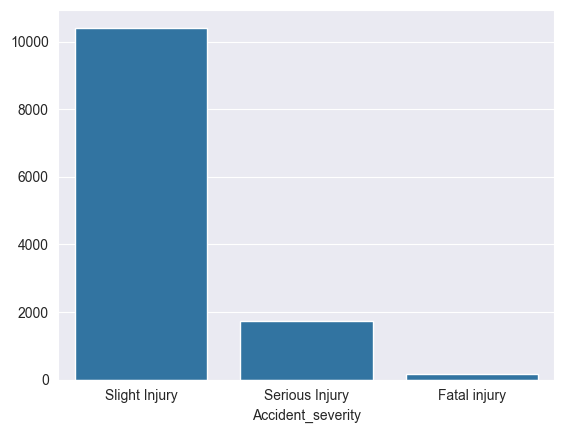

In [17]:
sns.barplot(x=df['Accident_severity'].value_counts().index,
            y=df['Accident_severity'].value_counts().values)
plt.show()

In [18]:
df['Accident_severity'].nunique()

3

In [19]:
def map_severity(severity):
    if severity == 'Slight Injury':
        return 1
    elif severity == 'Serious Injury':
        return 2
    elif severity == 'Fatal injury':
        return 3
    else:
        return None

In [20]:
df['Severity_Numeric'] = df['Accident_severity'].apply(map_severity)

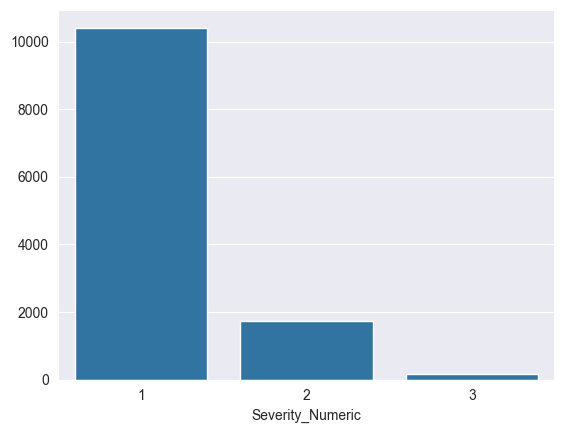

In [21]:
sns.barplot(x=df['Severity_Numeric'].value_counts().index,
            y=df['Severity_Numeric'].value_counts().values)
plt.show()

# Understanding the relationship between variables with nulls and the target variable

##Education Level

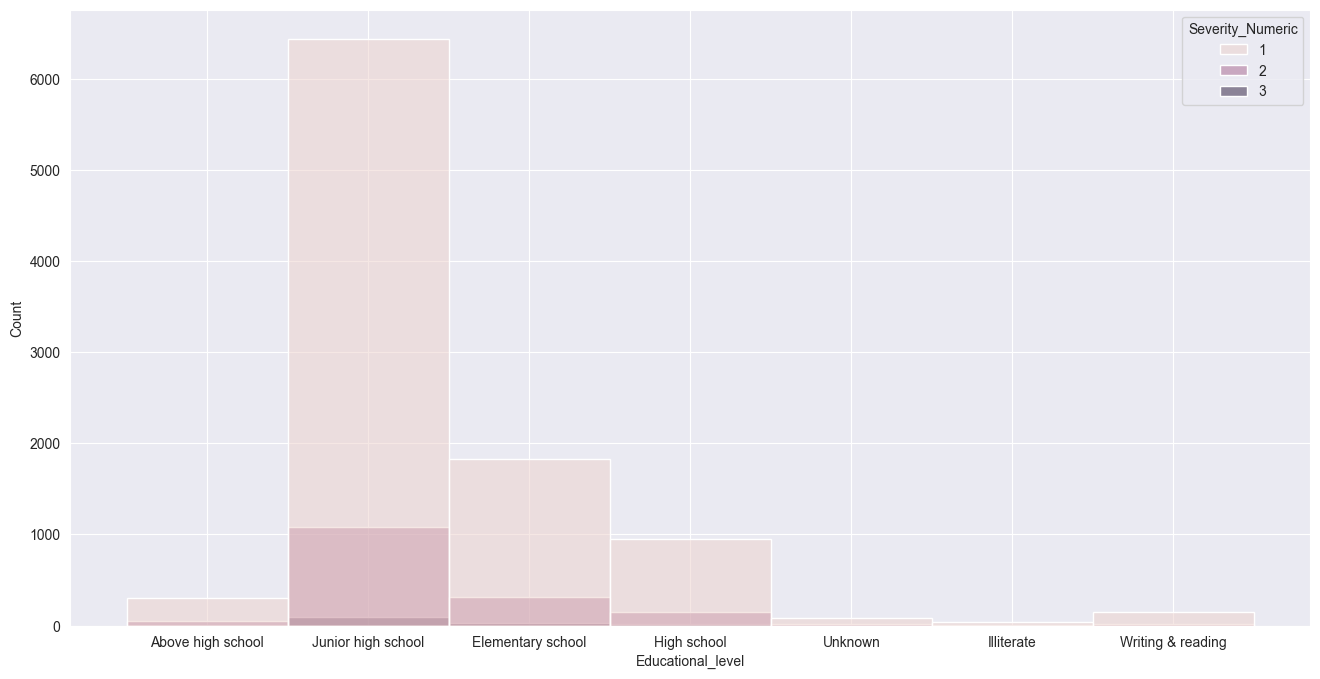

In [22]:
# creating the histogram of 'Educational_level'
plt.figure(figsize=(16,8))
sns.histplot(data=df, x='Educational_level', bins=16, hue='Severity_Numeric')
plt.show()

In [23]:
df['Educational_level'].isnull().sum()

741

In [24]:
df.loc[df['Severity_Numeric'] == 1, 'Educational_level'] = df.loc[df['Severity_Numeric'] == 1, 'Educational_level'].fillna('Elementary school')

In [25]:
df['Educational_level'].isnull().sum()

113

In [26]:
df.loc[df['Severity_Numeric'] == 2, 'Educational_level'] = df.loc[df['Severity_Numeric'] == 2, 'Educational_level'].fillna('High school')

In [27]:
df['Educational_level'].isnull().sum()

14

In [28]:
df.loc[df['Severity_Numeric'] == 3, 'Educational_level'] = df.loc[df['Severity_Numeric'] == 3, 'Educational_level'].fillna('Junior high school')

In [29]:
df['Educational_level'].isnull().sum()

0

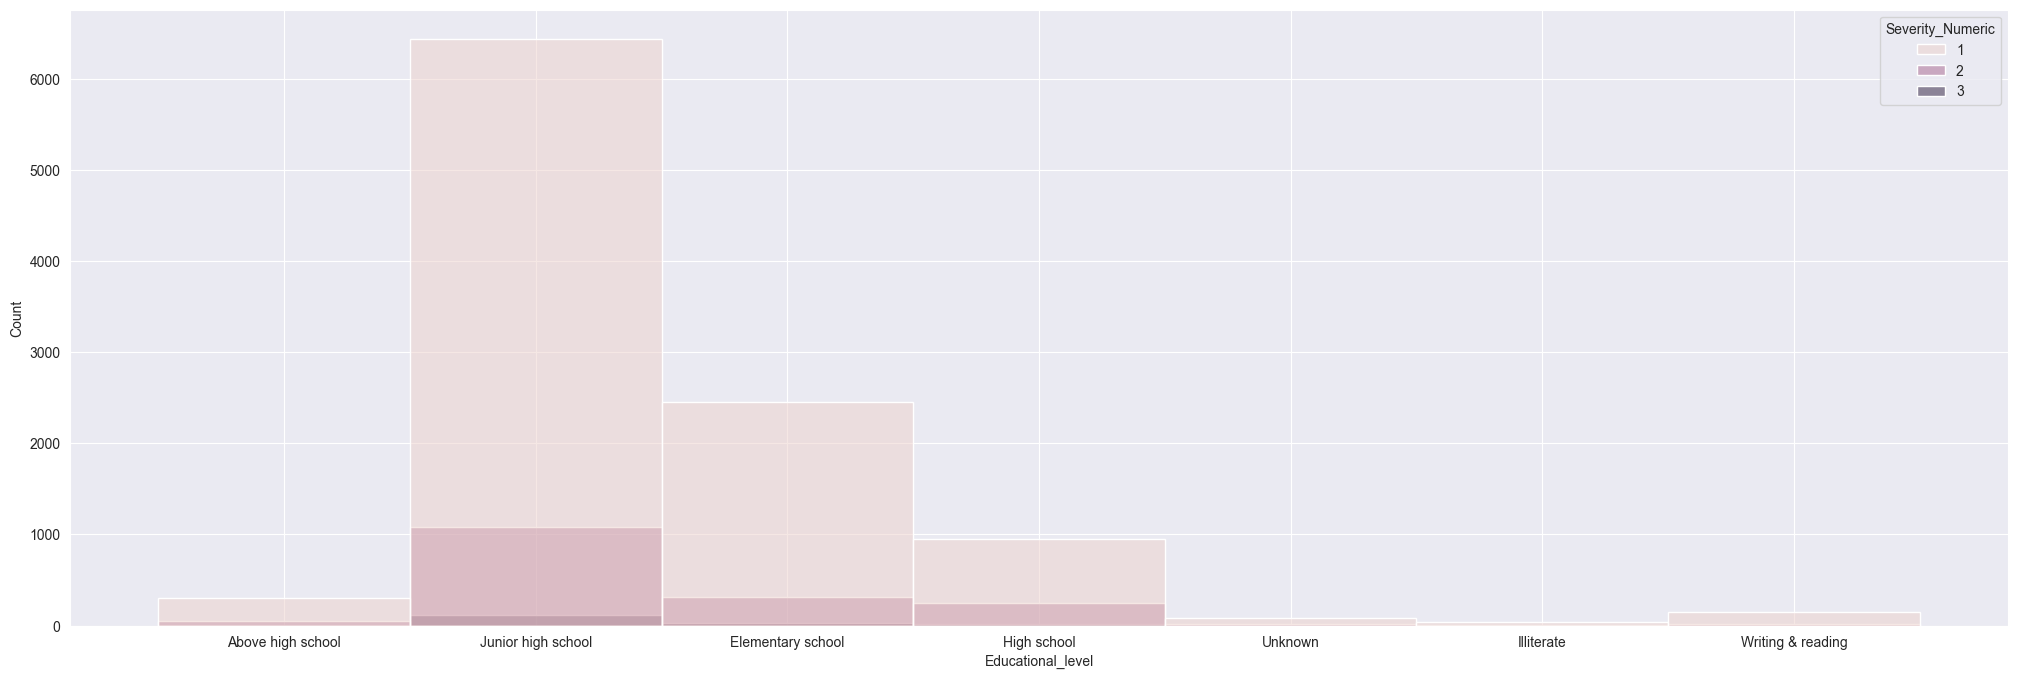

In [30]:
# creating the histogram of 'Educational_level'
plt.figure(figsize=(25,8))
sns.histplot(data=df, x='Educational_level', bins=16, hue='Severity_Numeric')
plt.show()

##Vehicle Driver Relation

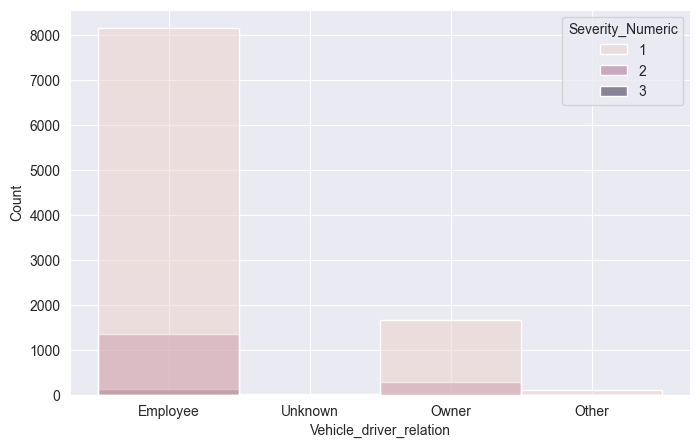

In [31]:
# creating the histogram of 'Vehicle_driver_relation'
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Vehicle_driver_relation', bins=16, hue='Severity_Numeric')
plt.show()

In [32]:
df['Vehicle_driver_relation'].isnull().sum()

579

In [33]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Owner')

In [34]:
df['Vehicle_driver_relation'].isnull().sum()

0

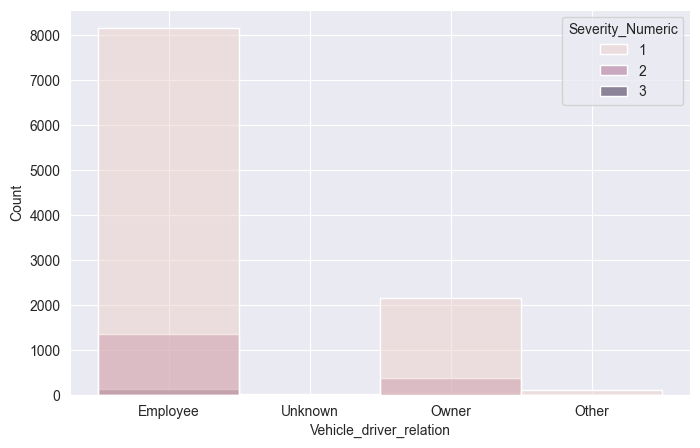

In [35]:
# creating the histogram of 'Vehicle_driver_relation'
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Vehicle_driver_relation', bins=16, hue='Severity_Numeric')
plt.show()

##Driving_experience

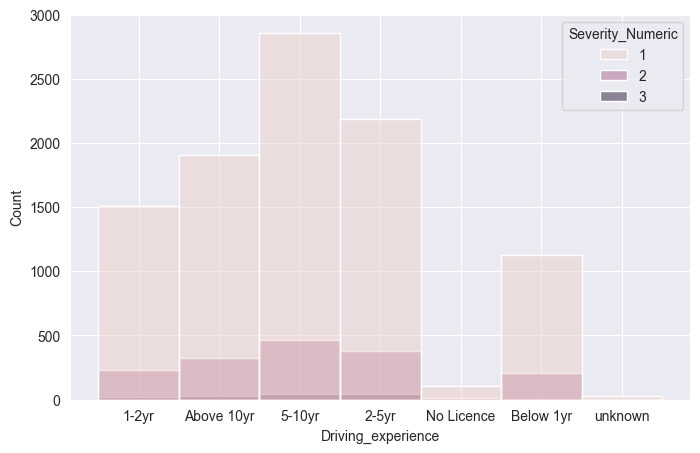

In [36]:
# creating the histogram of 'Driving_experience'
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Driving_experience', bins=16, hue='Severity_Numeric')
plt.show()

In [37]:
df['Driving_experience'].isnull().sum()

829

In [38]:
df.loc[df['Severity_Numeric'] == 3, 'Driving_experience'] = df.loc[df['Severity_Numeric'] == 3, 'Driving_experience'].fillna('2-5yr')

In [39]:
df['Driving_experience'].isnull().sum()

816

In [40]:
df.loc[df['Severity_Numeric'] == 2, 'Driving_experience'] = df.loc[df['Severity_Numeric'] == 2, 'Driving_experience'].fillna('Below 1yr')

In [41]:
df['Driving_experience'].isnull().sum()

693

In [42]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner'), 'Driving_experience'] = df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner'), 'Driving_experience'].fillna('2-5yr')

In [43]:
df['Driving_experience'].isnull().sum()

146

In [44]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Owner')

In [45]:
df['Driving_experience'].isnull().sum()

146

In [46]:
df['Driving_experience'] = df['Driving_experience'].fillna('Below 1yr')

In [47]:
df['Driving_experience'].isnull().sum()

0

##Type of Vehicle

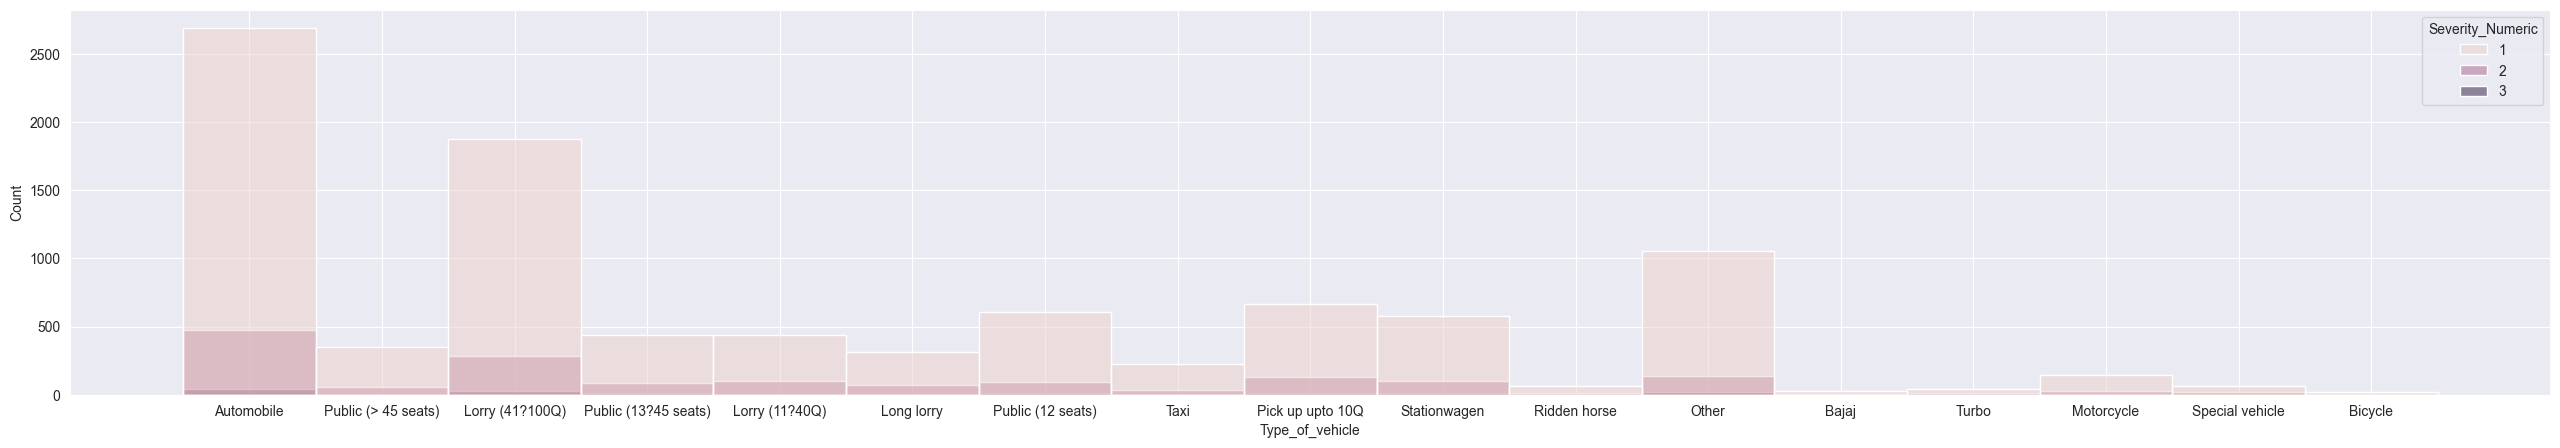

In [48]:
plt.figure(figsize=(32,5))
sns.histplot(data=df, x='Type_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [49]:
df['Type_of_vehicle'].isnull().sum()

950

In [50]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '2-5yr'), 'Type_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '2-5yr'), 'Type_of_vehicle'].fillna('Lorry (41?100Q)')

In [51]:
df.loc[(df['Severity_Numeric'] == 2) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '5-10yr'), 'Type_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==2) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '5-10yr'), 'Type_of_vehicle'].fillna('Other')

In [52]:
df.loc[(df['Severity_Numeric'] == 3) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '1-2yr'), 'Type_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==3) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '1-2yr'), 'Type_of_vehicle'].fillna('Other')

In [53]:
df['Type_of_vehicle'].isnull().sum()

709

In [54]:
df.loc[df['Severity_Numeric'] == 1, 'Type_of_vehicle'] = df.loc[df['Severity_Numeric'] == 1, 'Type_of_vehicle'].fillna('Other')

In [55]:
df.loc[df['Severity_Numeric'] == 2, 'Type_of_vehicle'] = df.loc[df['Severity_Numeric'] == 2, 'Type_of_vehicle'].fillna('Lorry (41?100Q)')

In [56]:
df.loc[df['Severity_Numeric'] == 3, 'Type_of_vehicle'] = df.loc[df['Severity_Numeric'] == 21, 'Type_of_vehicle'].fillna('Automobile')

In [57]:
df['Type_of_vehicle'].isnull().sum()

158

In [58]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('Pick up upto 10Q')

In [59]:
df['Type_of_vehicle'].isnull().sum()

0

##Owner of Vehicle

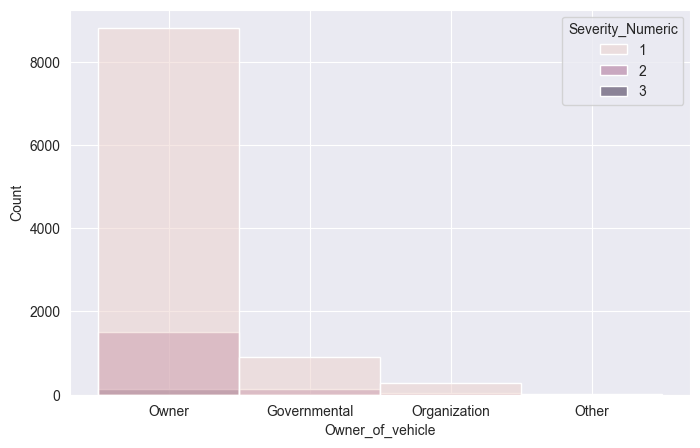

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Owner_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [61]:
df['Owner_of_vehicle'].isnull().sum()

482

In [62]:
df.loc[df['Severity_Numeric'] == 1, 'Owner_of_vehicle'] = df.loc[df['Severity_Numeric'] == 1, 'Owner_of_vehicle'].fillna('Government')

In [63]:
df['Owner_of_vehicle'].isnull().sum()

76

In [64]:
df.loc[df['Severity_Numeric'] == 2, 'Owner_of_vehicle'] = df.loc[df['Severity_Numeric'] == 2, 'Owner_of_vehicle'].fillna('Owner')

In [65]:
df['Owner_of_vehicle'].isnull().sum()

5

In [66]:
df.loc[df['Severity_Numeric'] == 3, 'Owner_of_vehicle'] = df.loc[df['Severity_Numeric'] == 3, 'Owner_of_vehicle'].fillna('Governmental')

In [67]:
df['Owner_of_vehicle'].isnull().sum()

0

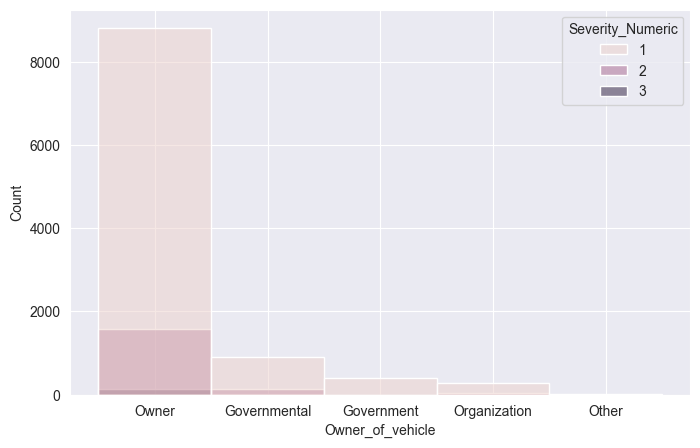

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Owner_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [69]:
df['Owner_of_vehicle'].isnull().sum()

0

##Service_year_of_vehicle

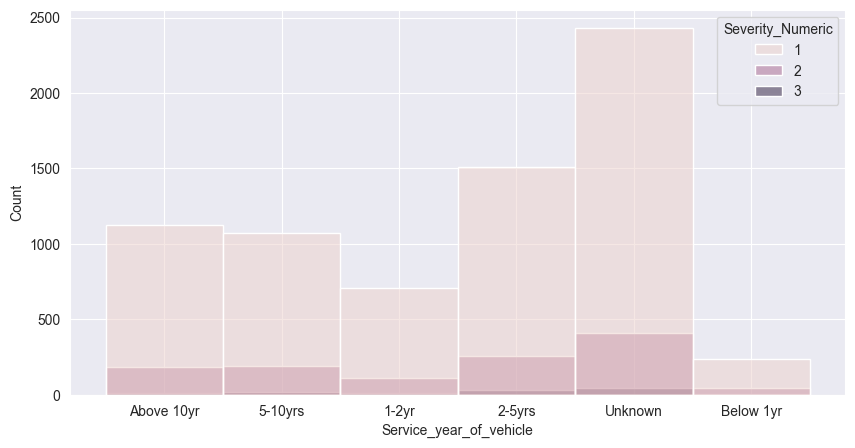

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Service_year_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [71]:
df['Service_year_of_vehicle'].isnull().sum()

3928

In [72]:
# Filter the DataFrame
filtered_df = df[(df['Severity_Numeric'] == 1) & (df['Service_year_of_vehicle'].isnull()) & (df['Driving_experience'] == '5-10yr') & (df['Owner_of_vehicle'] == 'Owner')]

# Count the rows
count_null_service_years = len(filtered_df)

count_null_service_years

687

In [73]:
# Filter the DataFrame
filtered_df = df[(df['Severity_Numeric'] == 1) & (df['Service_year_of_vehicle'].isnull()) & (df['Driving_experience'] == '2-5yr') & (df['Owner_of_vehicle'] == 'Owner')]

# Count the rows
count_null_service_years = len(filtered_df)

count_null_service_years

818

In [74]:
# Filter the DataFrame
filtered_df = df[(df['Severity_Numeric'] == 1) & (df['Service_year_of_vehicle'].isnull()) & (df['Driving_experience'] == '1-2yr') & (df['Owner_of_vehicle'] == 'Owner')]

# Count the rows
count_null_service_years = len(filtered_df)

count_null_service_years

388

In [75]:
# Filter the DataFrame
filtered_df = df[(df['Severity_Numeric'] == 1) & (df['Service_year_of_vehicle'].isnull()) & (df['Driving_experience'] == '5-10yr') & (df['Owner_of_vehicle'] == 'Governmental')]

# Count the rows
count_null_service_years = len(filtered_df)

count_null_service_years

74

In [76]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '1-2yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '1-2yr'), 'Service_year_of_vehicle'].fillna('1-2yrs')

In [77]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '5-10yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '5-10yr'), 'Service_year_of_vehicle'].fillna('2-5yrs')

In [78]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '2-5yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Owner') & (df['Driving_experience'] == '2-5yr'), 'Service_year_of_vehicle'].fillna('5-10yrs')

In [79]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '2-5yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '2-5yr'), 'Service_year_of_vehicle'].fillna('1-2yrs')

In [80]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '5-10yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '5-10-yr'), 'Service_year_of_vehicle'].fillna('1-2yrs')

In [81]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '1-2yr'), 'Service_year_of_vehicle'] = df.loc[(df['Severity_Numeric'] ==1) & (df['Owner_of_vehicle'] == 'Governmental') & (df['Driving_experience'] == '1-2yr'), 'Service_year_of_vehicle'].fillna('1-2yrs')

In [82]:
df.loc[df['Severity_Numeric'] == 1, 'Service_year_of_vehicle'] = df.loc[df['Severity_Numeric'] == 1, 'Service_year_of_vehicle'].fillna('Above 10yr')

In [83]:
df.loc[df['Severity_Numeric'] == 2, 'Service_year_of_vehicle'] = df.loc[df['Severity_Numeric'] == 2, 'Service_year_of_vehicle'].fillna('2-5yrs')

In [84]:
df.loc[df['Severity_Numeric'] == 3, 'Service_year_of_vehicle'] = df.loc[df['Severity_Numeric'] == 3, 'Service_year_of_vehicle'].fillna('2-5yrs')

In [85]:
df['Service_year_of_vehicle'].isnull().sum()

0

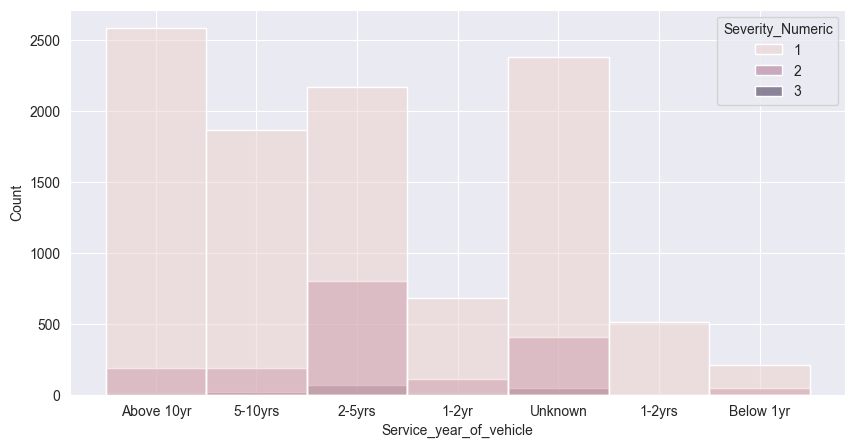

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Service_year_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

##Defect_of_vehicle

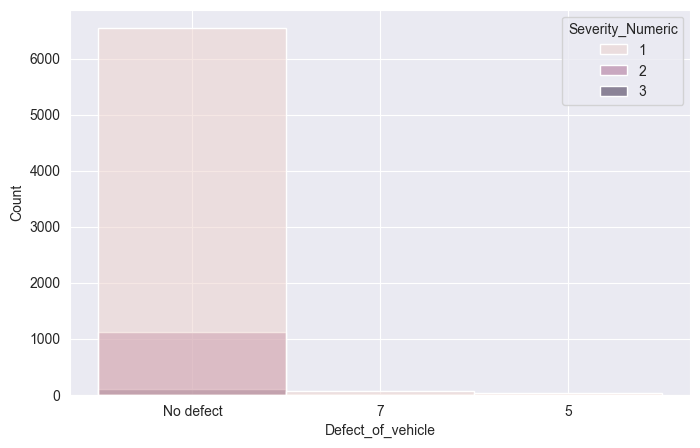

In [87]:

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Defect_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [88]:
df['Defect_of_vehicle'].isnull().sum()

4427

In [89]:
def map_defect(defect):
    if defect == 'No defect':
        return 'none'
    elif defect == '7':
        return 'some'
    elif defect == '5':
        return 'few'
    else:
        return None

In [90]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].apply(map_defect)

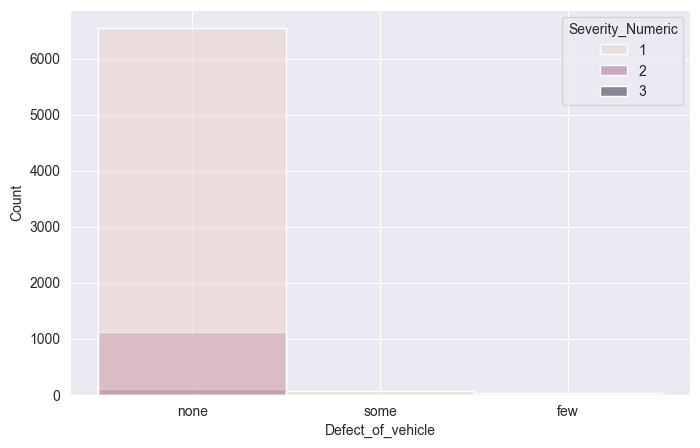

In [91]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Defect_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

In [92]:
count_of_values = df[df['Severity_Numeric'] == 1]['Defect_of_vehicle'].value_counts()

In [93]:
count_of_values

Defect_of_vehicle
none    6547
some      62
few       30
Name: count, dtype: int64

In [94]:
df['Defect_of_vehicle'].unique()

array(['none', None, 'some', 'few'], dtype=object)

In [95]:
df['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
none    7777
some      76
few       36
Name: count, dtype: int64

In [96]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'].fillna('none')

In [97]:
df['Defect_of_vehicle'].isnull().sum()

4179

In [98]:
df.loc[(df['Severity_Numeric'] == 2) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 2) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'].fillna('none')

In [99]:
df['Defect_of_vehicle'].isnull().sum()

4143

In [100]:
df.loc[(df['Severity_Numeric'] == 3) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 3) & (df['Owner_of_vehicle'] == 'Governmental'), 'Defect_of_vehicle'].fillna('none')

In [101]:
df['Defect_of_vehicle'].isnull().sum()

4136

In [102]:
df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 1) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'].fillna('some')

In [103]:
df['Defect_of_vehicle'].isnull().sum()

1100

In [104]:
df.loc[(df['Severity_Numeric'] == 2) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 2) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'].fillna('few')

In [105]:
df['Defect_of_vehicle'].isnull().sum()

557

In [106]:
df.loc[(df['Severity_Numeric'] == 3) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'] = df.loc[(df['Severity_Numeric'] == 3) & (df['Owner_of_vehicle'] == 'Owner'), 'Defect_of_vehicle'].fillna('none')

In [107]:
df['Defect_of_vehicle'].isnull().sum()

515

In [108]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna('few')

In [109]:
df['Defect_of_vehicle'].isnull().sum()

0

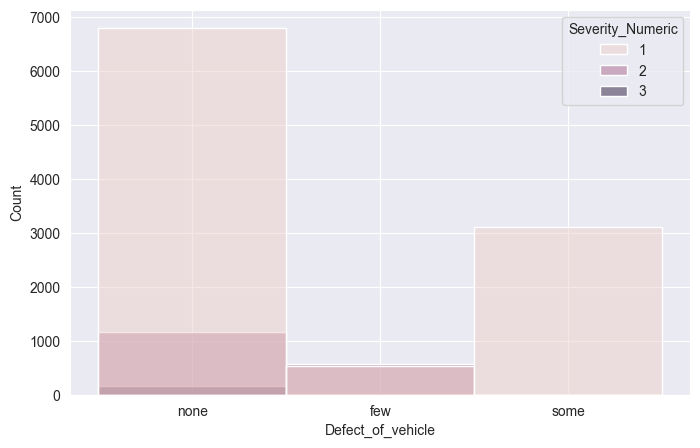

In [110]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Defect_of_vehicle', bins=16, hue='Severity_Numeric')
plt.show()

##Area_accident_occured

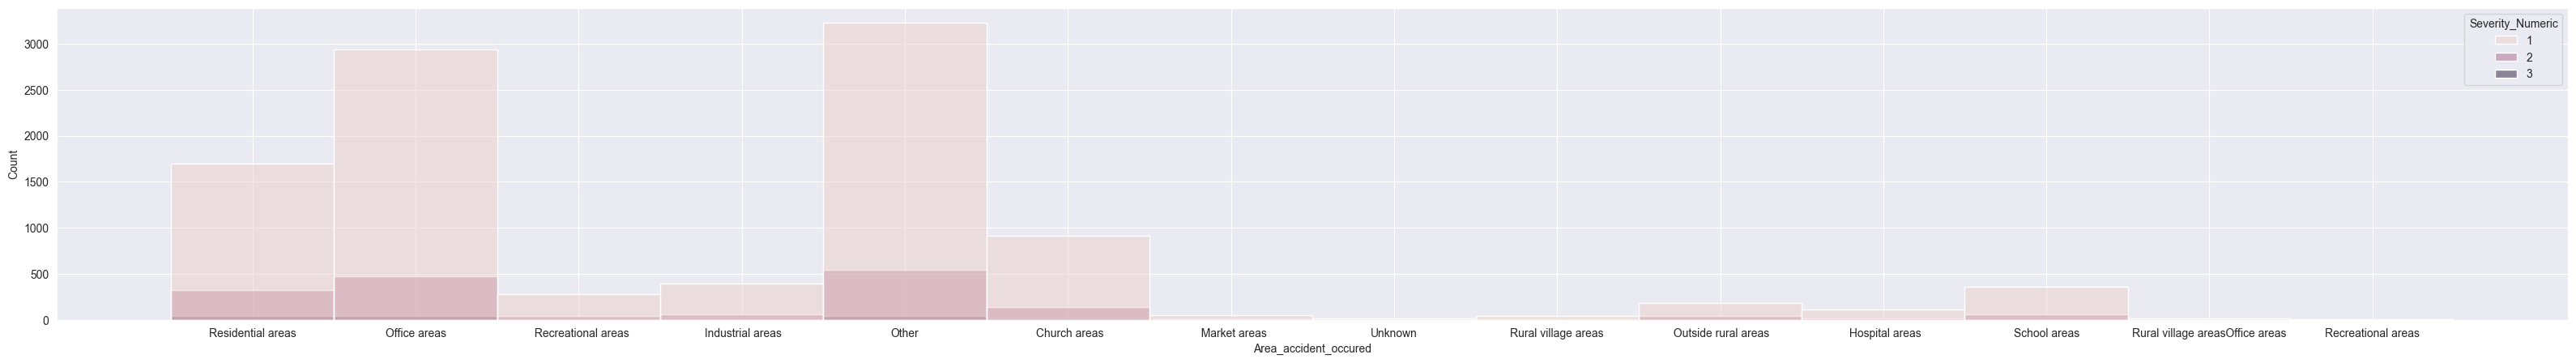

In [111]:
plt.figure(figsize=(40,5))
sns.histplot(data=df, x='Area_accident_occured', bins=16, hue='Severity_Numeric')
plt.show()

In [112]:
df.loc[df['Severity_Numeric'] == 1, 'Area_accident_occured'] = df.loc[df['Severity_Numeric'] == 1, 'Area_accident_occured'].fillna('office areas')

In [113]:
df['Area_accident_occured'].isnull().sum()

37

In [114]:
df['Area_accident_occured'] = df['Area_accident_occured'].fillna('other')

In [115]:
df['Area_accident_occured'].isnull().sum()

0

##Lanes_or_Medians

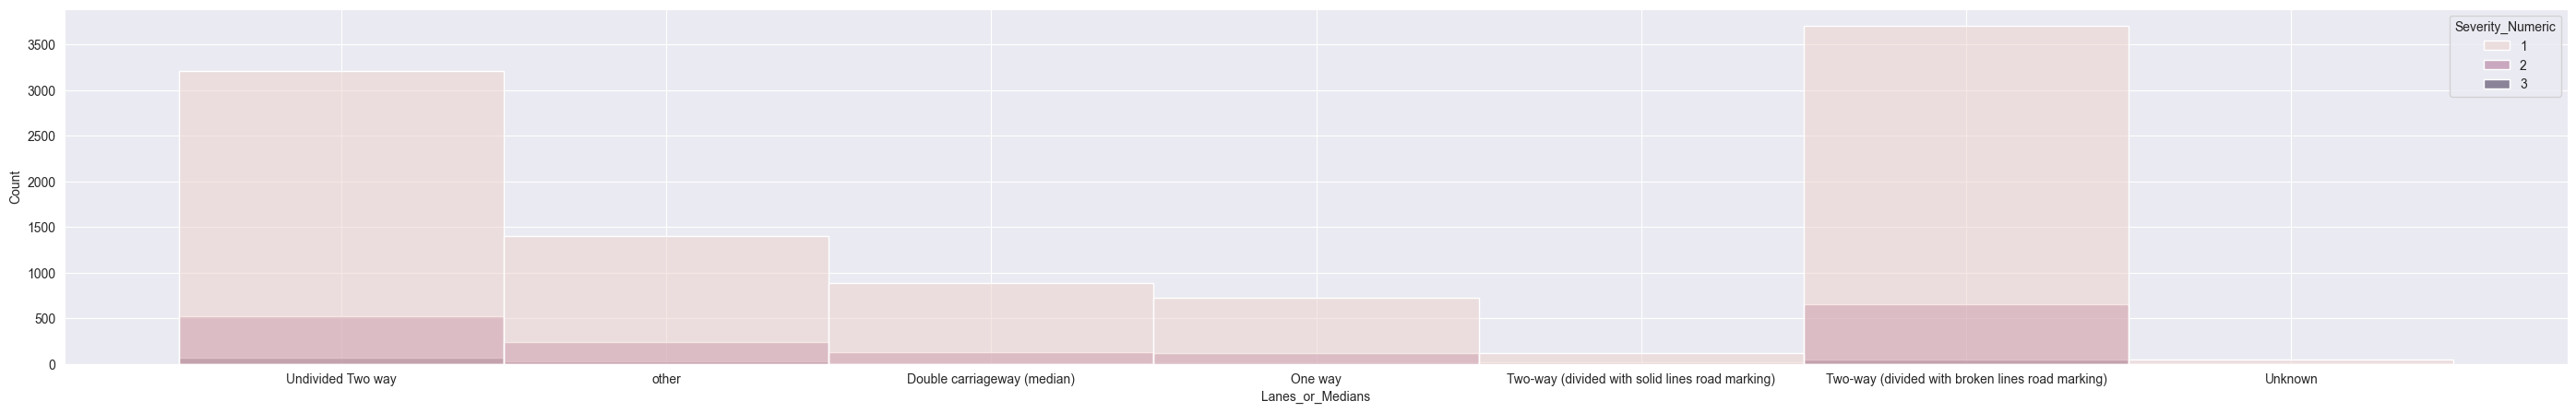

In [116]:
plt.figure(figsize=(35,5))
sns.histplot(data=df, x='Lanes_or_Medians', bins=16, hue='Severity_Numeric')
plt.show()

In [117]:
df['Lanes_or_Medians'].isnull().sum()

385

In [118]:
df.loc[df['Severity_Numeric'] == 1, 'Lanes_or_Medians'] = df.loc[df['Severity_Numeric'] == 1, 'Lanes_or_Medians'].fillna('Undivided Two Way')

In [119]:
df['Lanes_or_Medians'].isnull().sum()

53

In [120]:
df.loc[df['Severity_Numeric'] == 2, 'Lanes_or_Medians'] = df.loc[df['Severity_Numeric'] == 2, 'Lanes_or_Medians'].fillna('Two Way (divided with broken lines road marking)')

In [121]:
df['Lanes_or_Medians'].isnull().sum()

5

In [122]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna('Unknown')

##Road_allignment

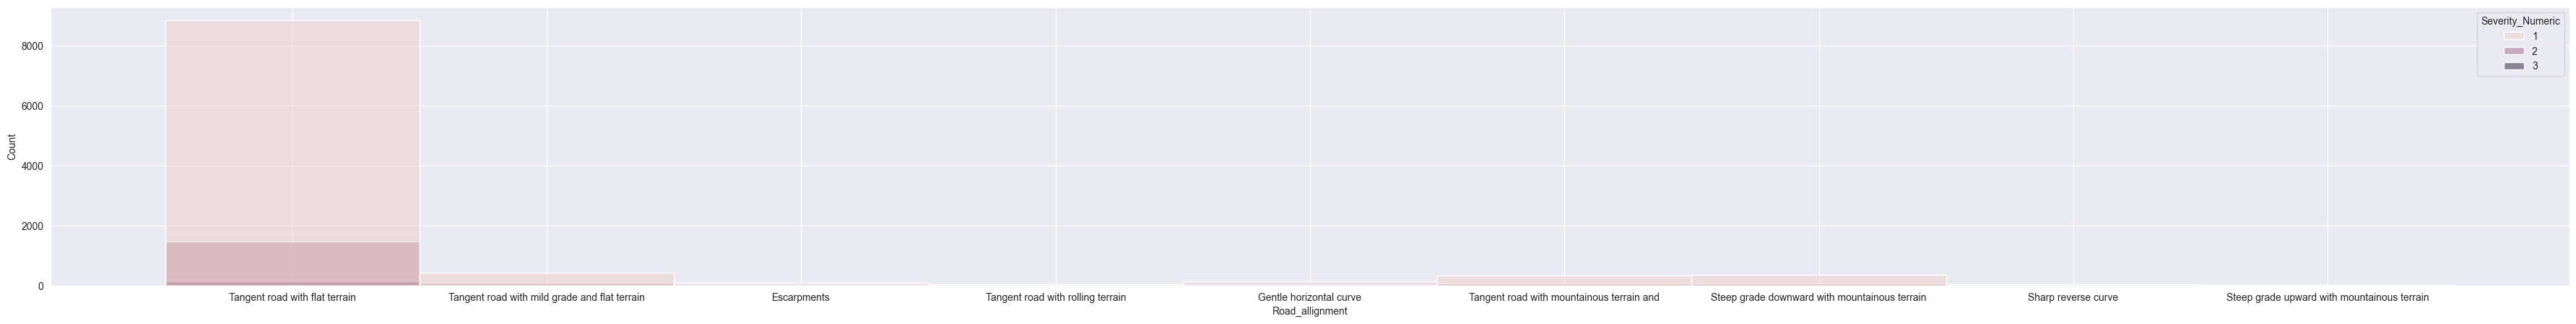

In [123]:
plt.figure(figsize=(45,5))
sns.histplot(data=df, x='Road_allignment', bins=16, hue='Severity_Numeric')
plt.show()

In [124]:
df.loc[df['Severity_Numeric'] == 1, 'Road_allignment'] = df.loc[df['Severity_Numeric'] == 1, 'Road_allignment'].fillna('Tangent road with flat terrain')

In [125]:
df['Road_allignment'].isnull().sum()

24

In [126]:
df['Road_allignment'] = df['Road_allignment'].fillna('Tangent road with flat terrain')

In [127]:
df['Road_allignment'].isnull().sum()

0

## Road_surface_type

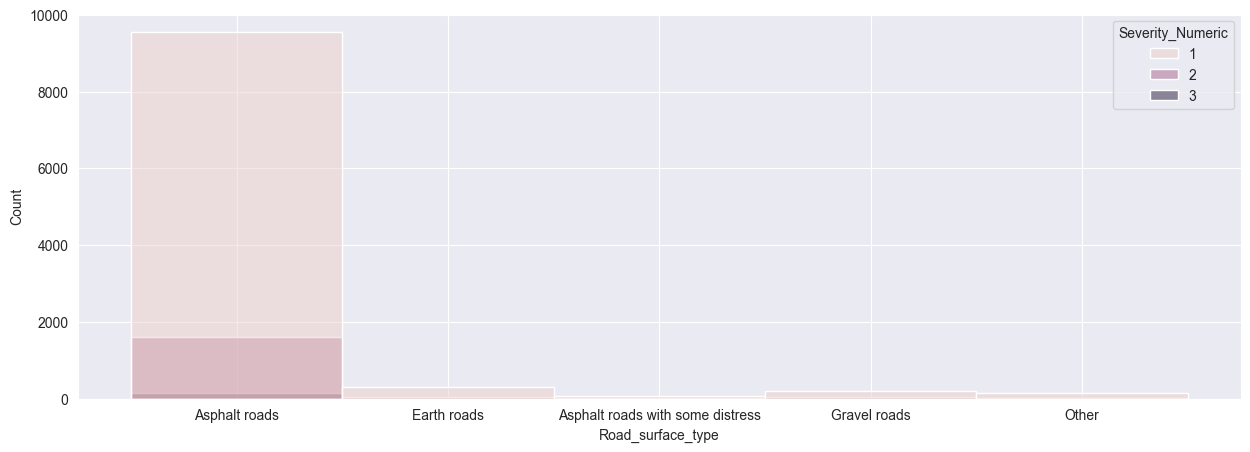

In [128]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Road_surface_type', bins=16, hue='Severity_Numeric')
plt.show()

In [129]:
df['Road_surface_type'].isnull().sum()

172

In [130]:
df['Road_surface_type'] = df['Road_surface_type'].fillna('Earth roads')

In [131]:
df['Road_surface_type'].isnull().sum()

0

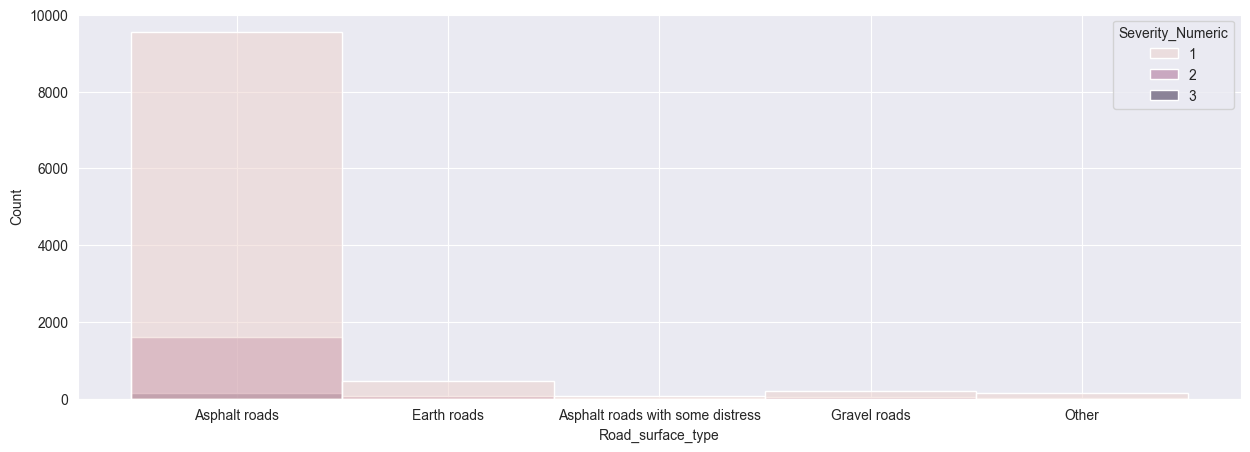

In [132]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Road_surface_type', bins=16, hue='Severity_Numeric')
plt.show()

## Types_of_Junction

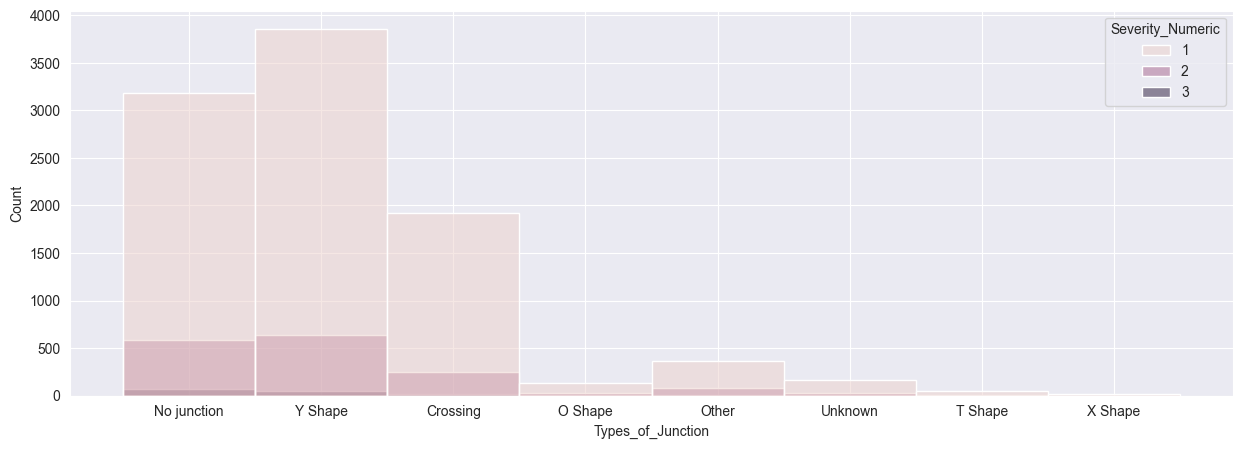

In [133]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Types_of_Junction', bins=16, hue='Severity_Numeric')
plt.show()

In [134]:
df['Types_of_Junction'].isnull().sum()

887

In [135]:
df['Types_of_Junction'] = df['Types_of_Junction'].fillna('Crossing')

In [136]:
df['Types_of_Junction'].isnull().sum()

0

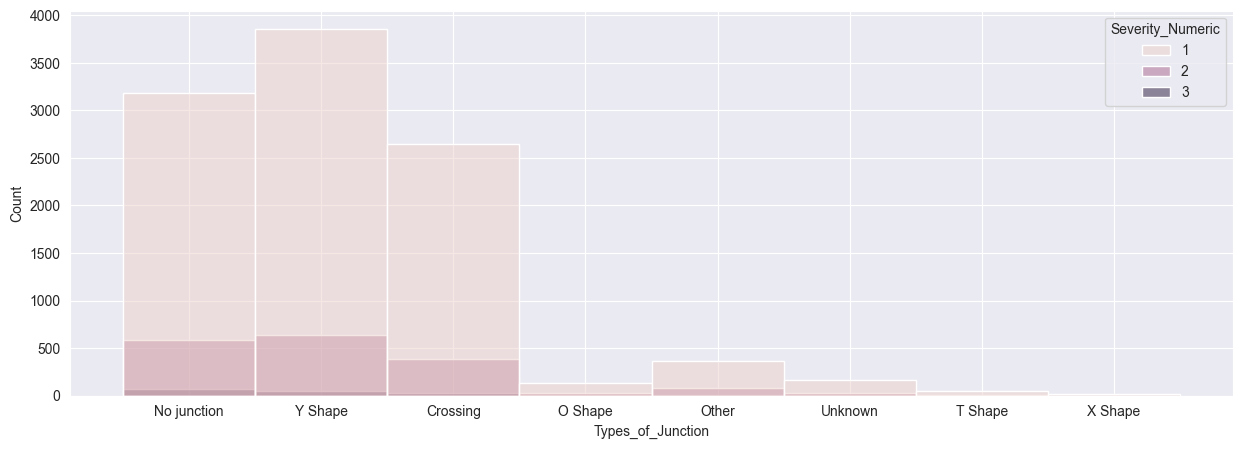

In [137]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Types_of_Junction', bins=16, hue='Severity_Numeric')
plt.show()

##Type_of_collision

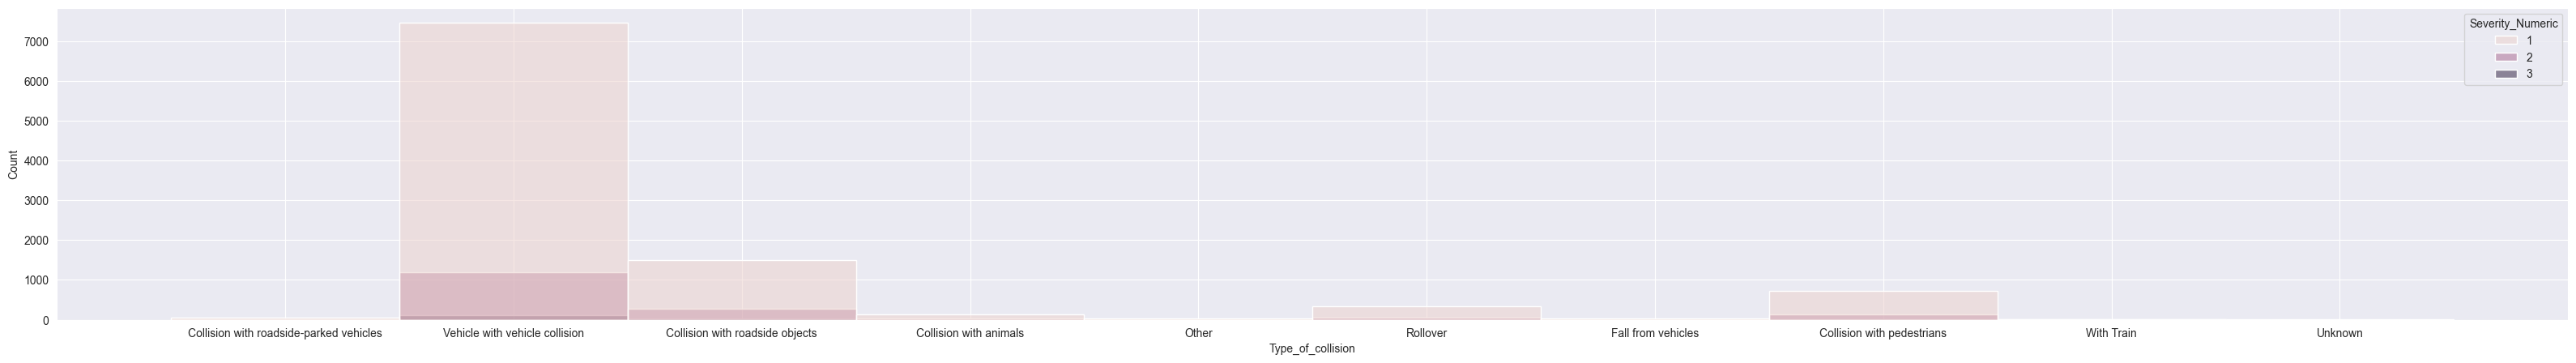

In [138]:
plt.figure(figsize=(40,5))
sns.histplot(data=df, x='Type_of_collision', bins=16, hue='Severity_Numeric')
plt.show()

In [139]:
df['Type_of_collision'].isnull().sum()

155

In [140]:
df['Type_of_collision'] = df['Type_of_collision'].fillna('Collision with roadside objects')

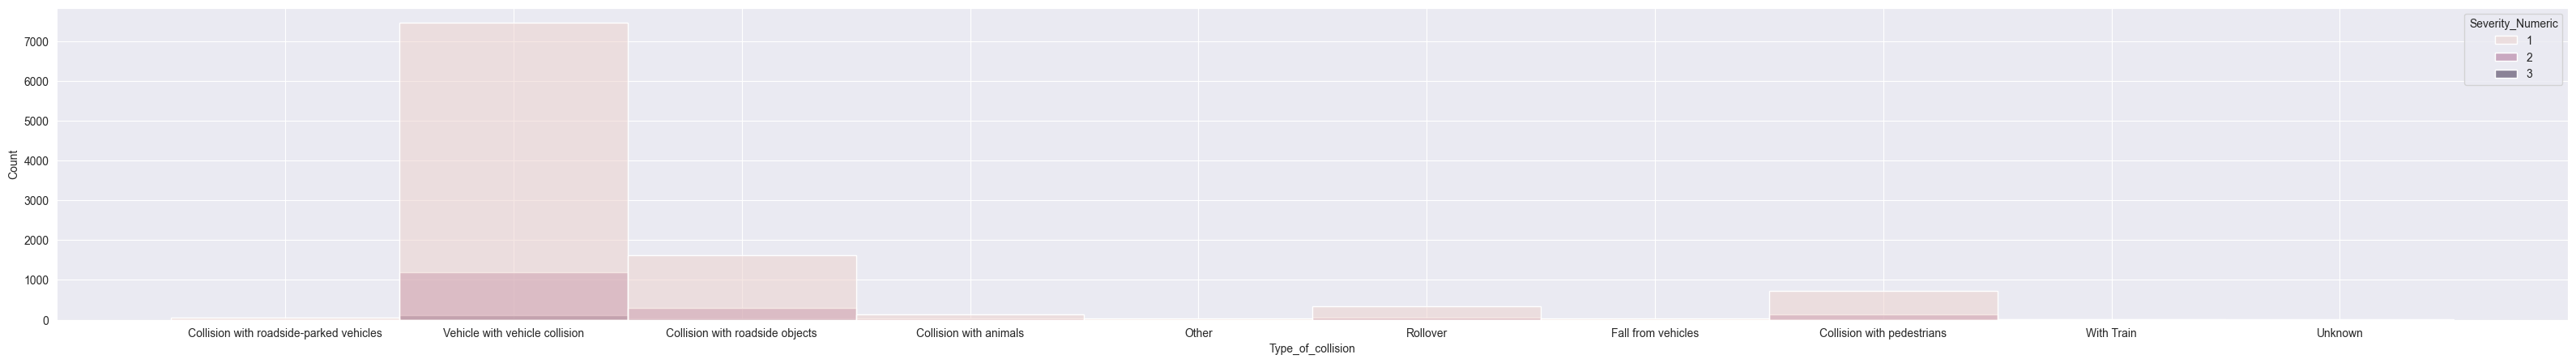

In [141]:
plt.figure(figsize=(40,5))
sns.histplot(data=df, x='Type_of_collision', bins=16, hue='Severity_Numeric')
plt.show()

##Vehicle_movement

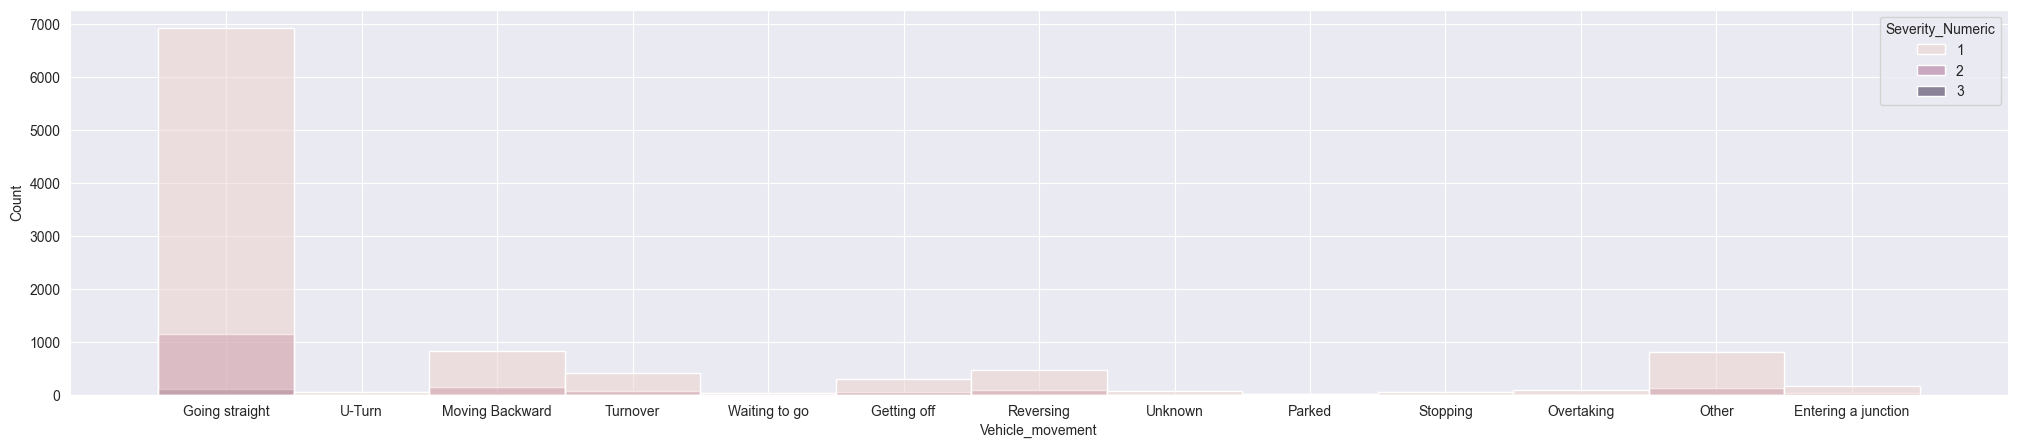

In [142]:
plt.figure(figsize=(25,5))
sns.histplot(data=df, x='Vehicle_movement', bins=16, hue='Severity_Numeric')
plt.show()

In [143]:
df['Vehicle_movement'].isnull().sum()

308

In [144]:
df['Vehicle_movement'] = df['Vehicle_movement'].fillna('Moving Backwards')

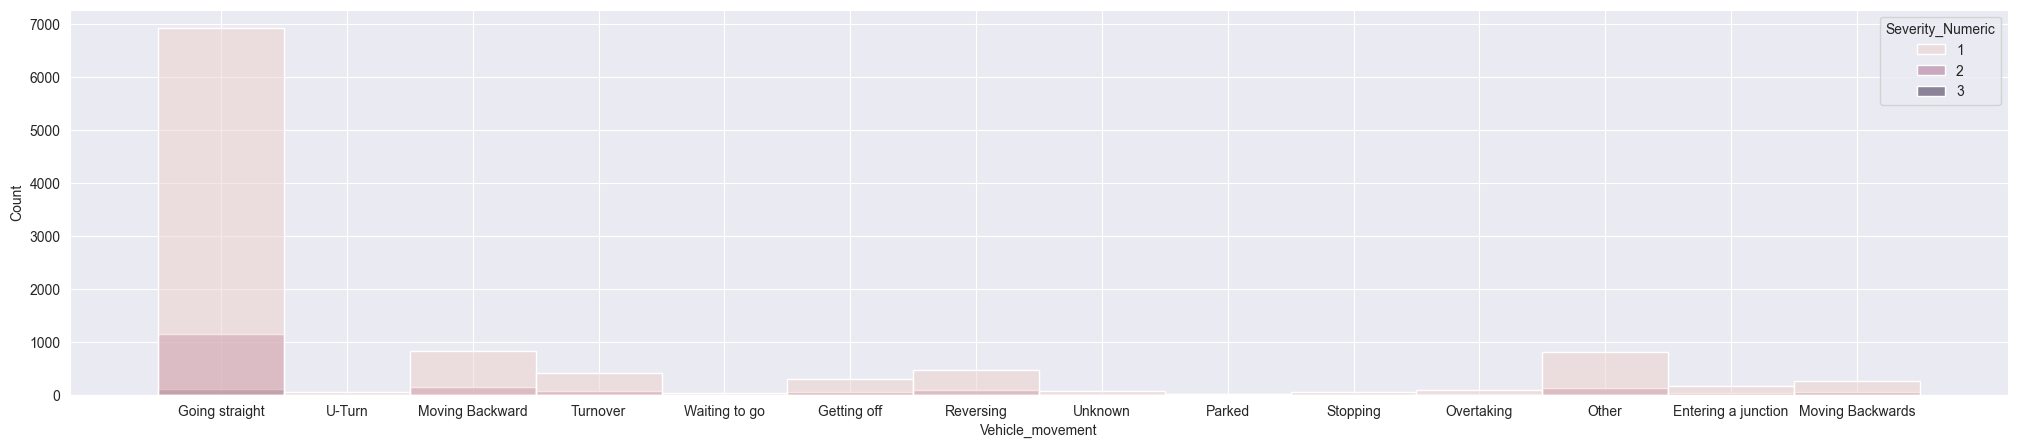

In [145]:
plt.figure(figsize=(25,5))
sns.histplot(data=df, x='Vehicle_movement', bins=16, hue='Severity_Numeric')
plt.show()

##Work_of_casuality

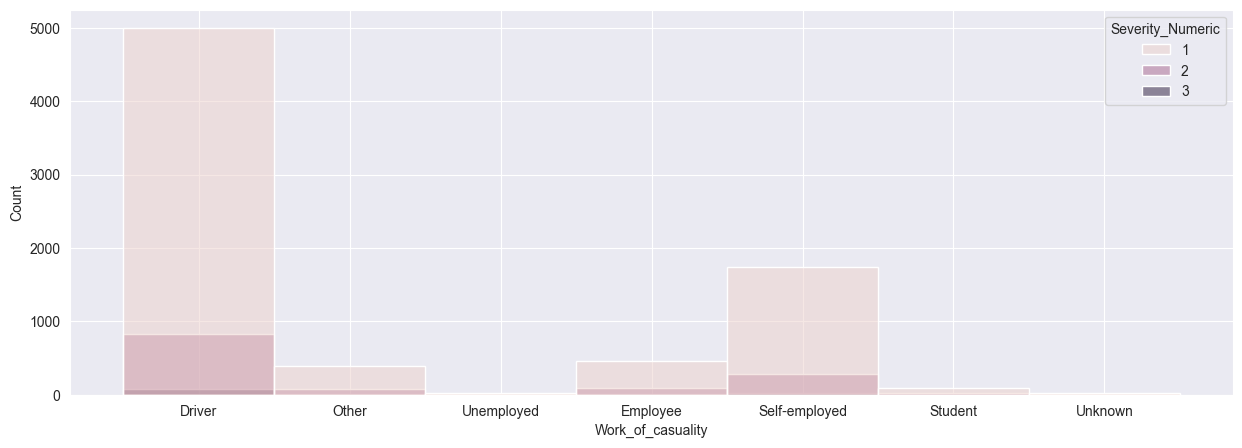

In [146]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Work_of_casuality', bins=16, hue='Severity_Numeric')
plt.show()

In [147]:
df['Work_of_casuality'].isnull().sum()

3198

##Fitness_of_casuality

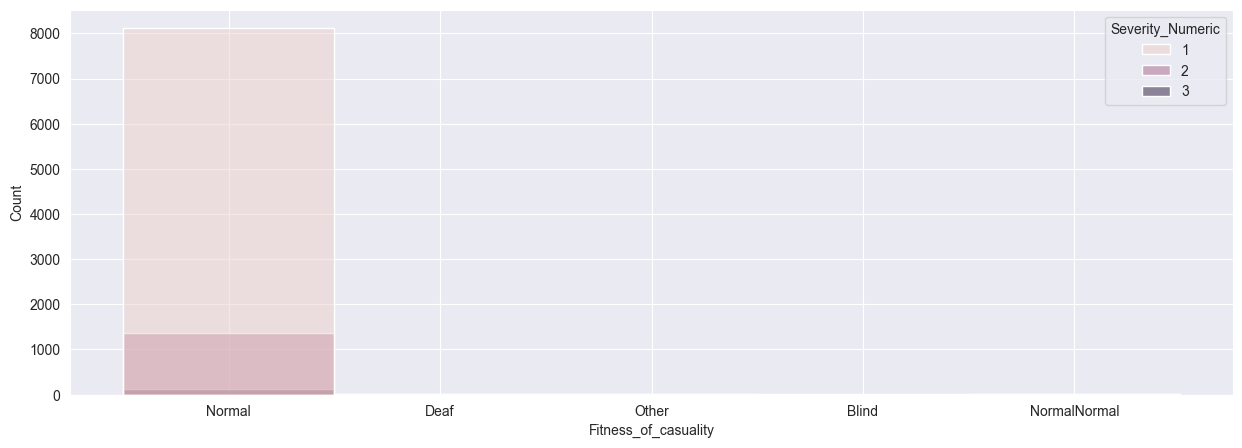

In [148]:

plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Fitness_of_casuality', bins=16, hue='Severity_Numeric')
plt.show()

In [149]:
df['Fitness_of_casuality'].isnull().sum()

2635

In [150]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna('Normal')

In [151]:
df['Fitness_of_casuality'].isnull().sum()

0

# **Date Time **

In [152]:
# converting 'time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# date (day-month-year) time
df["Time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

# Understanding different fields with plots

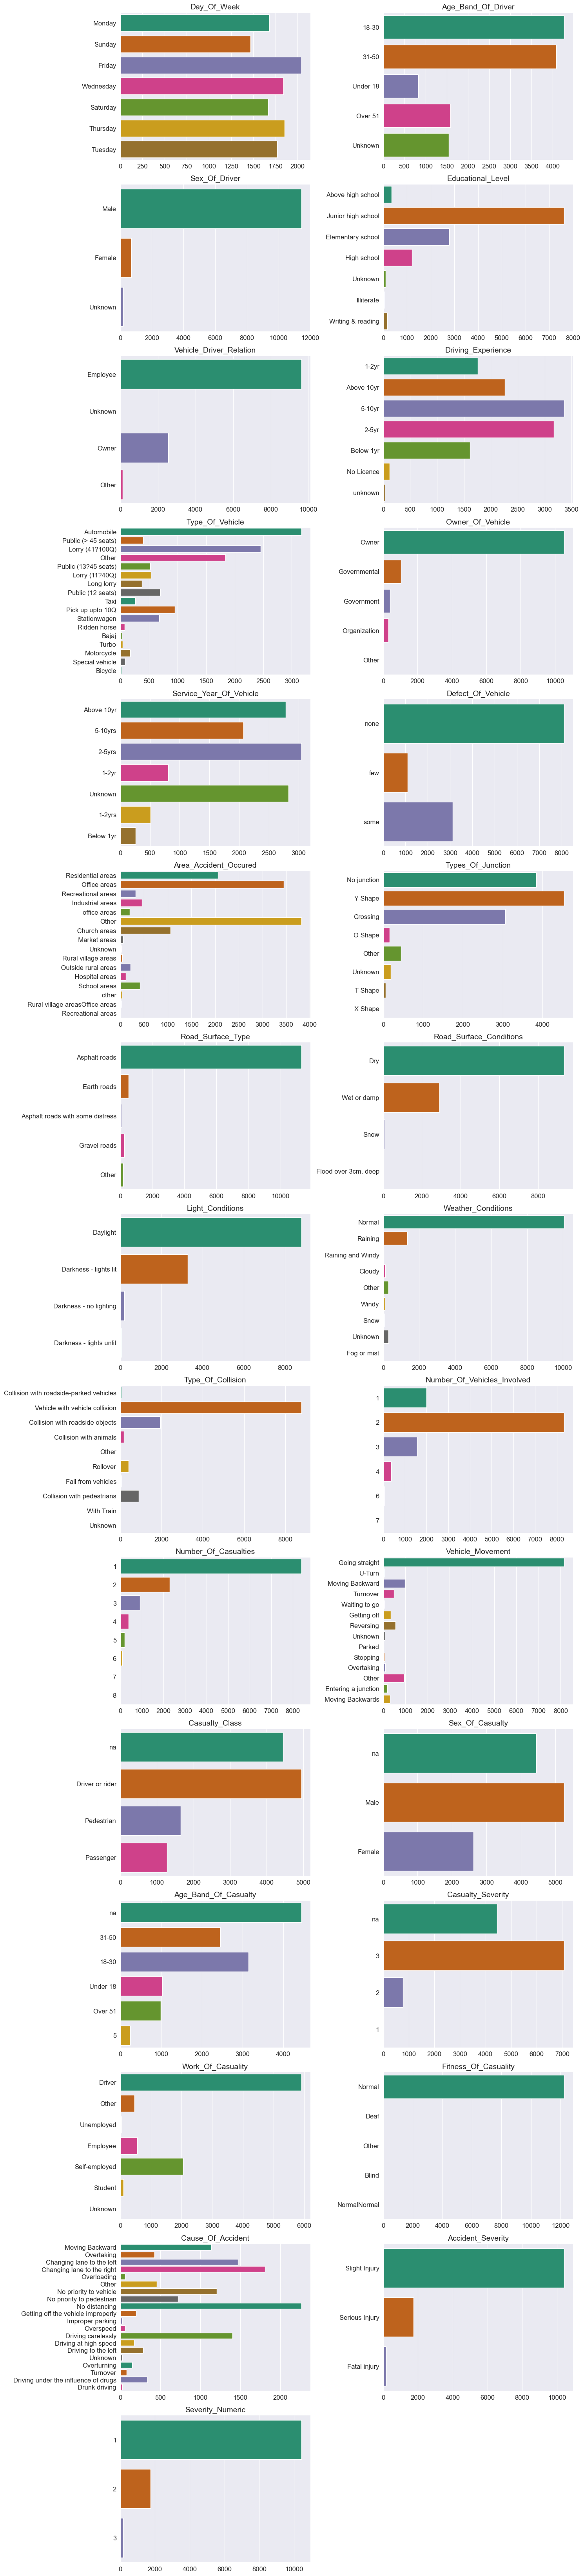

In [153]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

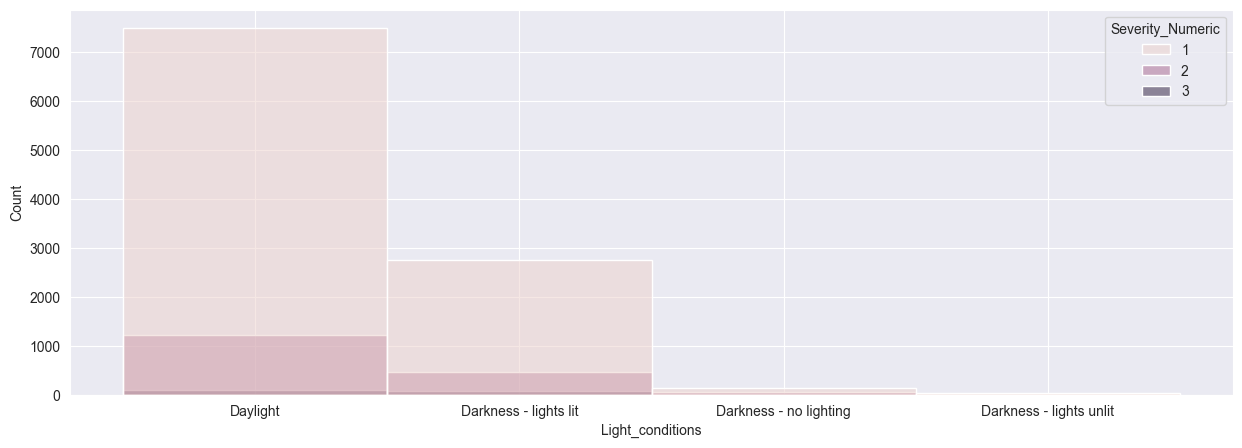

In [154]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Light_conditions', bins=16, hue='Severity_Numeric')
plt.show()

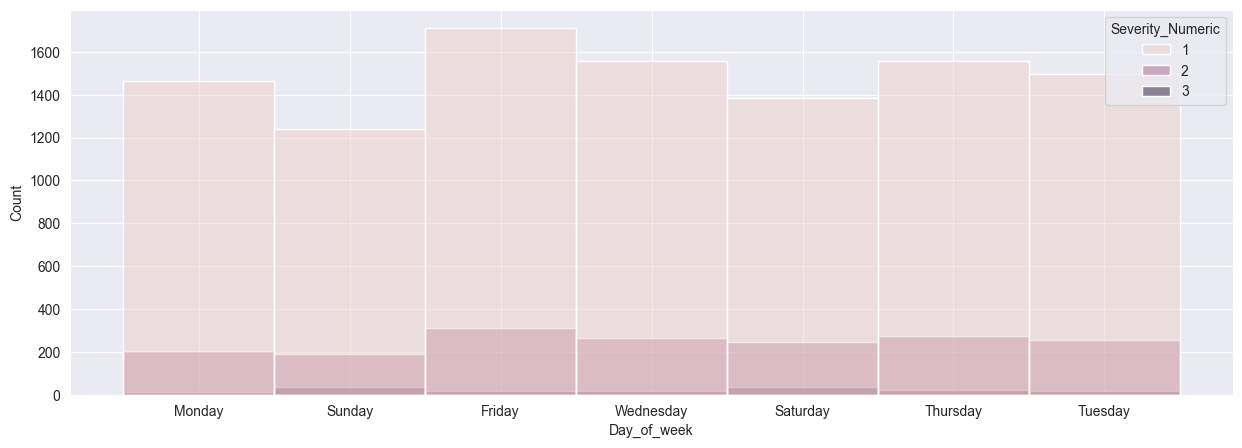

In [155]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Day_of_week', bins=16, hue='Severity_Numeric')
plt.show()

In [156]:
df.isna().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

# Feature encoding

In [157]:
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['Accident_severity', 'Severity_Numeric'], axis=1).columns)
df.shape

(12316, 34)

In [158]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Severity_Numeric,hour,minute
0,1,0,1,0,0,0,0,4,4,1,9,5,5,1,0,0,3,2,3,1,1,2,3,2,5,3,NaN,2,5,9,Slight Injury,1,17,2
1,1,1,1,4,0,3,11,4,3,1,6,6,5,1,0,0,3,2,8,1,1,2,3,2,5,3,NaN,2,5,16,Slight Injury,1,17,2
2,1,0,1,4,0,0,5,4,2,1,1,8,5,1,0,0,3,2,2,1,1,2,0,1,1,2,0.0,2,5,0,Serious Injury,2,17,2
3,3,0,1,4,0,2,11,1,4,1,6,8,6,7,2,0,0,2,8,1,1,2,2,0,0,2,0.0,2,5,1,Slight Injury,1,1,6
4,3,0,1,4,0,1,5,4,3,1,4,8,5,7,0,0,0,2,8,1,1,2,3,2,5,3,NaN,2,5,16,Slight Injury,1,1,6


# **Correlation & Fearure Selection**

In [159]:
# Independent Variable
X1 = df.drop(['Accident_severity'], axis = 1)

<Axes: >

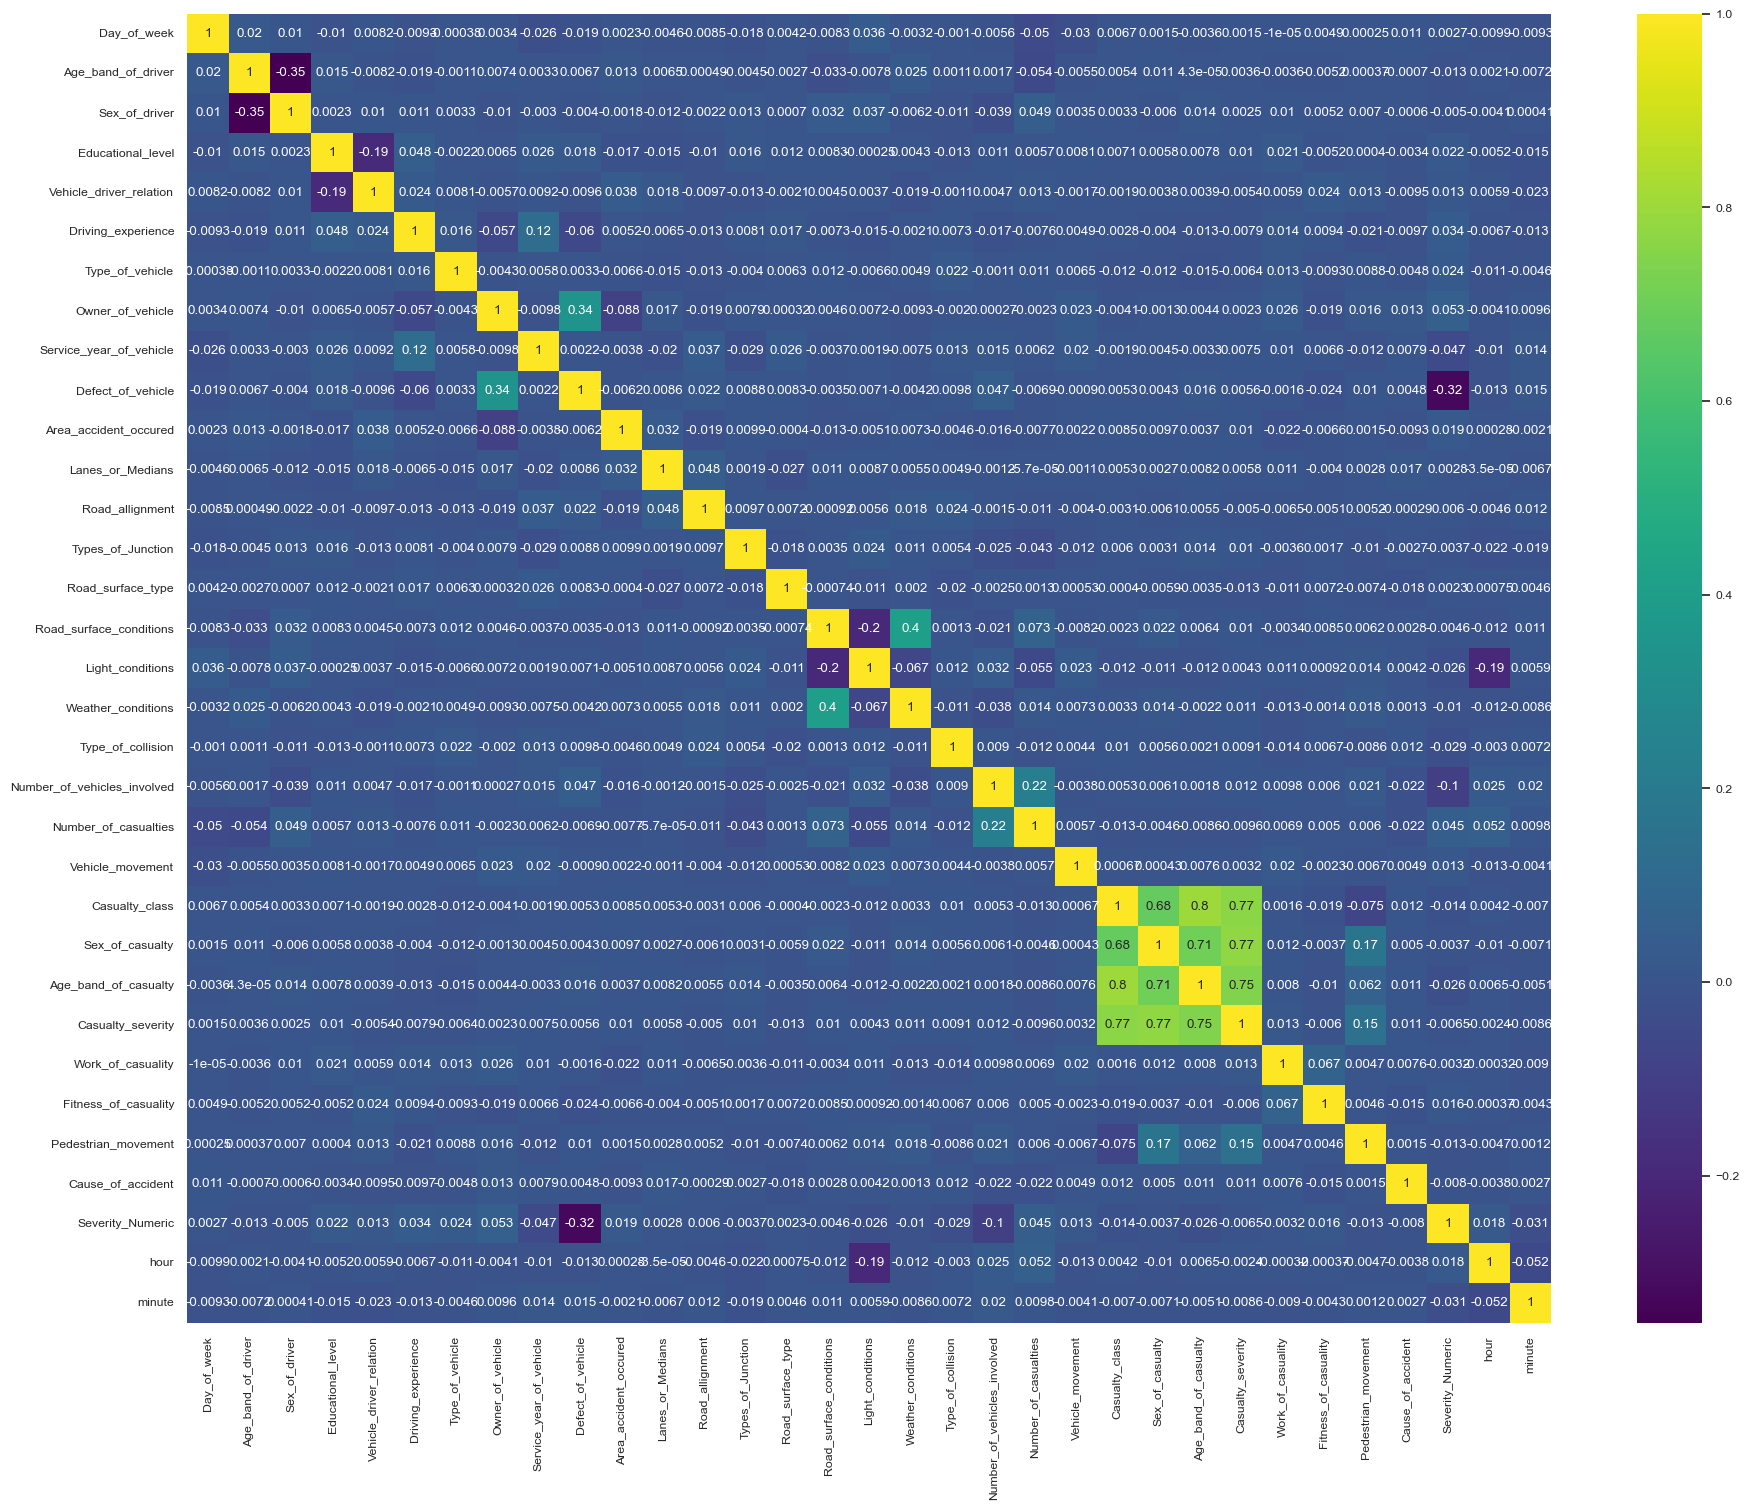

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(X1.corr(), annot=True, cmap=plt.cm.viridis)

In [161]:
# Threshold for removing correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = df.drop(['Accident_severity', 'Severity_Numeric', 'Work_of_casuality'], axis=1).corr().abs()
corr_matrix.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,hour,minute
Day_of_week,1.000000,0.019993,0.009986,0.010234,0.008245,0.009298,0.000384,0.003438,0.025851,0.019093,0.002336,0.004615,0.008505,0.018156,0.004245,0.008294,0.036280,0.003248,0.001039,0.005621,0.050042,0.029742,0.006661,0.001461,0.003642,0.001512,0.004884,0.000250,0.010516,0.009914,0.009277
Age_band_of_driver,0.019993,1.000000,0.351878,0.014770,0.008225,0.019011,0.001119,0.007380,0.003294,0.006691,0.012687,0.006519,0.000486,0.004453,0.002721,0.032533,0.007766,0.025482,0.001070,0.001690,0.054474,0.005507,0.005386,0.011358,0.000043,0.003565,0.005154,0.000372,0.000703,0.002069,0.007233
Sex_of_driver,0.009986,0.351878,1.000000,0.002270,0.010467,0.010902,0.003297,0.010291,0.003027,0.004009,0.001848,0.012122,0.002238,0.012891,0.000697,0.031601,0.037390,0.006179,0.011077,0.038643,0.048503,0.003521,0.003335,0.006046,0.014191,0.002474,0.005187,0.006981,0.000598,0.004134,0.000412
Educational_level,0.010234,0.014770,0.002270,1.000000,0.189984,0.047594,0.002241,0.006495,0.025500,0.017971,0.016892,0.015233,0.010441,0.015593,0.012262,0.008316,0.000253,0.004267,0.013374,0.011407,0.005728,0.008116,0.007129,0.005833,0.007849,0.010303,0.005166,0.000403,0.003407,0.005207,0.015256
Vehicle_driver_relation,0.008245,0.008225,0.010467,0.189984,1.000000,0.023540,0.008090,0.005750,0.009233,0.009637,0.038083,0.017761,0.009659,0.012845,0.002120,0.004452,0.003666,0.019373,0.001088,0.004713,0.012922,0.001663,0.001938,0.003763,0.003943,0.005366,0.024270,0.013223,0.009549,0.005948,0.023146


In [162]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

upper.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,hour,minute
Day_of_week,NaN,0.019993,0.009986,0.010234,0.008245,0.009298,0.000384,0.003438,0.025851,0.019093,0.002336,0.004615,0.008505,0.018156,0.004245,0.008294,0.036280,0.003248,0.001039,0.005621,0.050042,0.029742,0.006661,0.001461,0.003642,0.001512,0.004884,0.000250,0.010516,0.009914,0.009277
Age_band_of_driver,NaN,NaN,0.351878,0.014770,0.008225,0.019011,0.001119,0.007380,0.003294,0.006691,0.012687,0.006519,0.000486,0.004453,0.002721,0.032533,0.007766,0.025482,0.001070,0.001690,0.054474,0.005507,0.005386,0.011358,0.000043,0.003565,0.005154,0.000372,0.000703,0.002069,0.007233
Sex_of_driver,NaN,NaN,NaN,0.002270,0.010467,0.010902,0.003297,0.010291,0.003027,0.004009,0.001848,0.012122,0.002238,0.012891,0.000697,0.031601,0.037390,0.006179,0.011077,0.038643,0.048503,0.003521,0.003335,0.006046,0.014191,0.002474,0.005187,0.006981,0.000598,0.004134,0.000412
Educational_level,NaN,NaN,NaN,NaN,0.189984,0.047594,0.002241,0.006495,0.025500,0.017971,0.016892,0.015233,0.010441,0.015593,0.012262,0.008316,0.000253,0.004267,0.013374,0.011407,0.005728,0.008116,0.007129,0.005833,0.007849,0.010303,0.005166,0.000403,0.003407,0.005207,0.015256
Vehicle_driver_relation,NaN,NaN,NaN,NaN,NaN,0.023540,0.008090,0.005750,0.009233,0.009637,0.038083,0.017761,0.009659,0.012845,0.002120,0.004452,0.003666,0.019373,0.001088,0.004713,0.012922,0.001663,0.001938,0.003763,0.003943,0.005366,0.024270,0.013223,0.009549,0.005948,0.023146


Accidents:

Had 2 vehicles and 2 casualties


Most of the drivers:

1. ale and in 18-30 yrs age group
2. Education level of these -- Junior high school
3. Most of them are employees
4. hey even have 5-10 yrs of driving experience
5. Most are owned passenger vehicles.
6. Drivers with 2-5yrs of experience caused most fatal injuries and those with 7. 5-10yrs experience caused most non-fatal injuries.

Most of the drivers have met with accident on:

1. two-way lanes
2. tangent road with flat terrains
3. most accidents on asphalt roads
4. different weather conditions don't matter

Most of the casualties:

1. Severity1 is the highest -- slight injury.


The conditions on which most of the drivers met with the accident are:

1. vehicle to vehicle collision
2. Not keeping enough distance between the vehicles was the major cause for most of the accidents

Observations:

1. Highest number of non-fatal injuries  and accidents overall happened on fridays.


2. Most of the accident happened around offices
3. acidents in residential areas have led to fatal injuries.
4. Most accidents with fatal injuries occured on undivided two-ways.
5. Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
6. Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.

7. Most of the accidents have happened at daylight.


8. Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.

9. Moving backward led to most of the accidents with fatal injuries
10. failing to keep enough distance between vehicles led to more number of non-fatal injuries.

In [163]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)

There are 2 columns to remove.
['Age_band_of_casualty', 'Casualty_severity']


# Model Intiation

In [164]:
X = df.drop(['Accident_severity', 'Severity_Numeric', 'Work_of_casuality', 'Age_band_of_casualty', 'Casualty_severity'], axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 29) (3695, 29) (8621,) (3695,)


# Imbalance Treatment

In [165]:
# upsampling using smote

counter = Counter(y_train)



for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)



for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")



print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 29) (21972,)


# Encoding the target variable

In [166]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

# **Model Application and Scoring**

In [167]:
scores = {}

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
scores['xgb']= [accuracy_score(y_test, y_pred)]
print(scores['xgb'])

[0.8728010825439784]


In [169]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores['rf']= [accuracy_score(y_test, y_pred)]
print(scores['rf'])

[0.8592692828146143]


In [170]:
xtr = ExtraTreesClassifier()
xtr.fit(X_train, y_train)
y_pred = xtr.predict(X_test)
scores['xtr'] = [accuracy_score(y_test, y_pred)]
print(scores['xtr'])

[0.8717185385656292]


#***F1 Score***

In [171]:
Accuracy  =  accuracy_score(y_test, y_pred)
Precision =  precision_score(y_test, y_pred, average= 'weighted')
Recall    =  recall_score(y_test, y_pred, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
result = [Accuracy, Precision, Recall, F1_score]
result

[0.8717185385656292,
 0.8585056691732048,
 0.8717185385656292,
 0.8524539802469867]

In [172]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


xtr_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 300},
 0.9077484414731359)

In [173]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini')

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

xtr_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': None, 'max_depth': 15, 'min_samples_split': 2},
 0.9451242082703725)

In [ ]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

xgb2 = XGBClassifier(ccp_alpha = 0.0)

gsearch2 = GridSearchCV(
    estimator= xgb2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

xgb_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 11, 'min_samples_split': 2},
 0.959911217417403)

In [174]:
xtr_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                max_depth = 15,
                                n_estimators = 400)

xtr_tuned.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=400)

In [175]:
print(xtr_tuned.feature_importances_)

[0.02838885 0.03313767 0.00934844 0.0143488  0.02074366 0.03033745
 0.18454094 0.03242742 0.02698684 0.269217   0.01290141 0.01865228
 0.0065235  0.01925306 0.00733909 0.01880797 0.03456018 0.00938884
 0.01546088 0.03431801 0.03406102 0.00987234 0.02780761 0.03166812
 0.0009152  0.00664182 0.01600328 0.02030844 0.02603986]


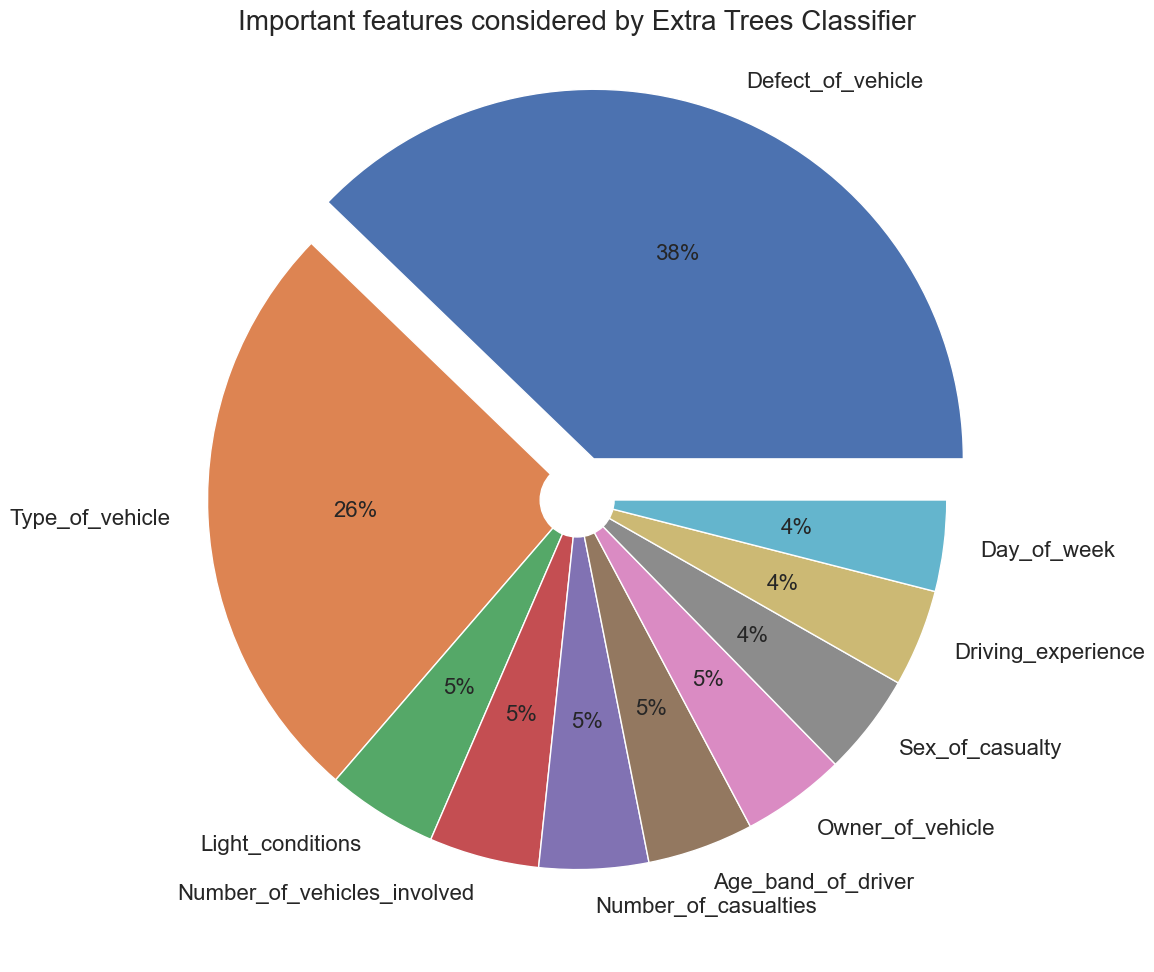

In [176]:
feat_importances = pd.Series(xtr_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [ ]:
y_pred_xtr = xtr_tuned.predict(X_test)
score_xtr = accuracy_score(y_test, y_pred_xtr)
print("Accuracy:", score_xtr )

Accuracy: 0.8506089309878214


In [177]:
X_new_xtr = ['hour', 'Day_of_week','Defect_of_vehicle', 'Type_of_vehicle','Light_conditions','Owner_of_vehicle', 'Number_of_vehicles_involved','Number_of_casualties','Age_band_of_driver', 
                 'Casualty_class', 'Driving_experience']
X_train_xtr = X_train[X_new_xtr]

In [178]:
y_train_xtr = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [179]:
y_test_xtr = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']

In [180]:
X_test_xtr = X_test[X_new_xtr]

In [181]:
xtr_tuned.fit(X_train_xtr, y_train_xtr)
y_pred_xtr = xtr_tuned.predict(X_test_xtr)
score_xtr = accuracy_score(y_test_xtr, y_pred_xtr)
print("Accuracy:", score_xtr )

Accuracy: 0.8286874154262517


In [182]:
xgb_tuned = XGBClassifier(ccp_alpha = 0.0,
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 11
                                )

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None, ccp_alpha=0.0,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [183]:
print(xgb_tuned.feature_importances_)

[0.00606921 0.00882474 0.01522248 0.00798496 0.01355614 0.00593517
 0.14225484 0.04266283 0.01027332 0.58665204 0.00593573 0.00715142
 0.00775594 0.00453722 0.00657106 0.01186896 0.00931675 0.00780032
 0.00554079 0.02358751 0.0075447  0.0055033  0.00667226 0.0056295
 0.00936392 0.02060712 0.00433643 0.00537362 0.00546772]


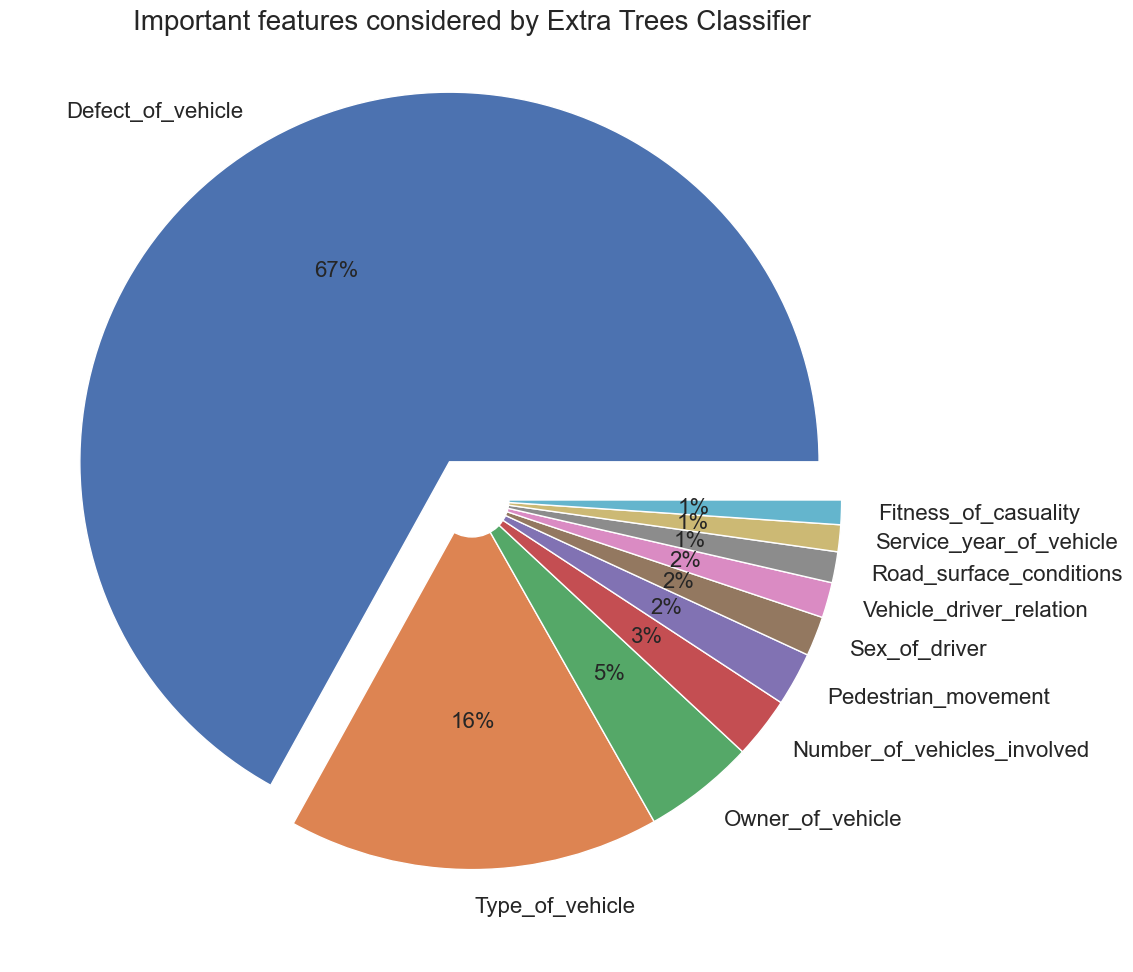

In [184]:
feat_importances = pd.Series(xgb_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [185]:
feat_importances


Day_of_week                    0.006069
Age_band_of_driver             0.008825
Sex_of_driver                  0.015222
Educational_level              0.007985
Vehicle_driver_relation        0.013556
Driving_experience             0.005935
Type_of_vehicle                0.142255
Owner_of_vehicle               0.042663
Service_year_of_vehicle        0.010273
Defect_of_vehicle              0.586652
Area_accident_occured          0.005936
Lanes_or_Medians               0.007151
Road_allignment                0.007756
Types_of_Junction              0.004537
Road_surface_type              0.006571
Road_surface_conditions        0.011869
Light_conditions               0.009317
Weather_conditions             0.007800
Type_of_collision              0.005541
Number_of_vehicles_involved    0.023588
Number_of_casualties           0.007545
Vehicle_movement               0.005503
Casualty_class                 0.006672
Sex_of_casualty                0.005629
Fitness_of_casuality           0.009364


In [ ]:
X = df.drop(['Accident_severity', 'Severity_Numeric', 'Work_of_casuality', 'Age_band_of_casualty', 'Casualty_severity'], axis=1)
y = df['Accident_severity']

In [186]:
X_new = ['Defect_of_vehicle', 'Type_of_vehicle', 'Owner_of_vehicle', 'Number_of_vehicles_involved','Pedestrian_movement','Sex_of_driver', 
                 'Vehicle_driver_relation', 'Road_surface_conditions', 'Service_year_of_vehicle', 'Fitness_of_casuality']
X_train_new = X_train[X_new]

In [187]:

X_train_new.shape

(21972, 10)

In [188]:
y_train_new = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [189]:
y_train_new.shape

(21972,)

In [190]:
y_test_new = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']

In [191]:
y_train_new.shape

(21972,)

In [192]:
xgb4 = XGBClassifier(
ccp_alpha = 0.0,
 n_estimators=4000,
 max_depth=10,
 min_samples_split = 2,
  gamma=0,
 objective= 'binary:logistic',
 )
xgb4.fit(X_train_new, y_train_new)

XGBClassifier(base_score=None, booster=None, callbacks=None, ccp_alpha=0.0,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=4000,
              n_jobs=None, ...)

In [ ]:
xgb_tuned.fit(X_train, y_train)
y_pred_xgb = xgb_tuned.predict(X_test)
score_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", score_xgb )

Accuracy: 0.8755074424898511


In [193]:
X_test_new = X_test[X_new]

In [194]:
xgb4.fit(X_train_new, y_train_new)
y_pred_xgb = xgb4.predict(X_test_new)
score_xgb4 = accuracy_score(y_test_new, y_pred_xgb)
print("Accuracy:", score_xgb4 )

Accuracy: 0.8067658998646821


Saving the Model

In [ ]:
rtamodel = xtr_tuned

In [196]:
import joblib
joblib.dump(xgb4,'xgb_final.joblib')

['xgb_final.joblib']

In [198]:
model_loaded = joblib.load(r'xgb_final.joblib')

In [ ]:
print("Feature names in X_train:", X_train_new.columns)
print("Feature names in X_test:", X_test_new.columns)

Feature names in X_train: Index(['Defect_of_vehicle', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Number_of_vehicles_involved', 'Pedestrian_movement', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Road_surface_conditions',
       'Service_year_of_vehicle', 'Fitness_of_casuality'],
      dtype='object')
Feature names in X_test: Index(['Defect_of_vehicle', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Number_of_vehicles_involved', 'Pedestrian_movement', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Road_surface_conditions',
       'Service_year_of_vehicle', 'Fitness_of_casuality'],
      dtype='object')


In [ ]:
model = joblib.load('xtr_final.joblib')

In [ ]:
df['Defect_of_vehicle'].unique()

array([1, 0, 2])

In [ ]:
df['Number_of_vehicles_involved'].unique()

array([1, 0, 2, 4, 3, 5])